# Objetivo Geral

O objetivo deste relátório é analisar os fatores que influenciam o desempenho dos alunos no Exame Nacional do Ensino Médio (ENEM) no estado da Paraíba, e identificar padrões ou tendências que possam estar associados a nota ou o contexto socioecônomico em que o aluno está inserido.

### Base de dados do Enem:

Conjunto de dados que contém informações sobre os participantes do Exame Nacional do Ensino Médio (ENEM) do estado da Paraíba, incluindo suas notas nas diferentes áreas de conhecimento, características socioeconômicas, entre outros.

### Carregamento dos dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             recall_score,
                             precision_score)

In [ ]:
caminho = "/content/dados_enem_tratados.csv"
enem = (
    pd.read_csv(caminho, sep=";", encoding="utf-8")
)

enem

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210055757060,2022,Menor de 26 anos,F,Solteiro(a),Branca,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,A,A,A,B,A,B,D,A,A,B
1,210056456129,2022,Menor de 26 anos,M,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,A,A,A,B,A,A,E,A,B,B
2,210057972331,2022,Menor de 26 anos,M,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,A,A,A,B,A,A,B,A,A,B
3,210056887659,2022,Menor de 26 anos,F,Solteiro(a),Branca,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Privada,...,A,A,B,C,A,A,D,A,B,B
4,210055681384,2022,Menor de 26 anos,F,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,B,A,B,C,A,B,D,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21478,210054551070,2022,26 anos ou mais,F,Casado(a)/Mora com companheiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,A,A,A,B,A,A,B,A,A,B
21479,210055543302,2022,Menor de 26 anos,M,Solteiro(a),Parda,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,A,A,A,A,A,A,E,A,A,B
21480,210057528084,2022,Menor de 26 anos,M,Solteiro(a),Branca,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,A,A,A,B,A,A,C,A,A,A
21481,210055572731,2022,Menor de 26 anos,F,Solteiro(a),Não declarado,Brasileiro(a),Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,B,A,A,B,A,A,D,A,A,B


# Analise Exploratória dos dados:

### Visualização da Distribuição do sexo do aluno

A análise dos dados revelou que o número de alunos do sexo feminino (11,491) supera ligeiramente o número de alunos do sexo masculino (9,992). Observe o gráfico abaixo:

Contagem de alunos por sexo:
TP_SEXO
F    11491
M     9992
Name: count, dtype: int64


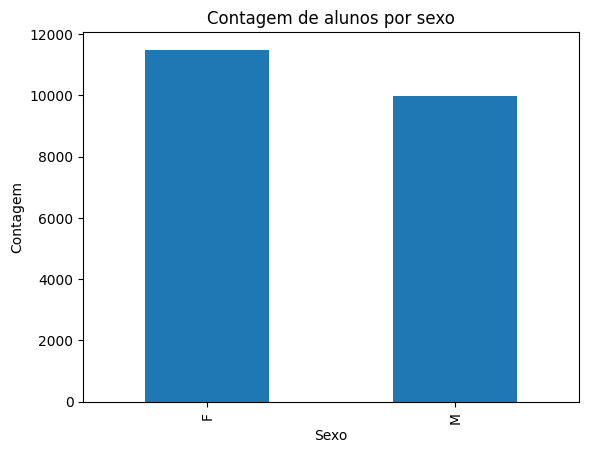

In [ ]:
# Análise da variável sexo
print("Contagem de alunos por sexo:")
print(enem["TP_SEXO"].value_counts())

# Visualização gráfica
plt.figure()
enem["TP_SEXO"].value_counts().plot(kind="bar")
plt.title("Contagem de alunos por sexo")
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.show()


### Visualização da Distribuição da Raça/Cor do aluno

A análise da distribuição dos alunos por raça/cor revelou que a maioria dos participantes se identifica como parda, representando 11.253 alunos, seguida por alunos brancos, totalizando 7.360. Em menor número, temos alunos pretos, com 1.880 participantes. Além disso, observamos um número significativo de alunos que não declararam sua raça/cor, totalizando 439. As raças/cor amarela e indígena estão representadas por 386 e 165 alunos, respectivamente. Observe o gráfico seguir:


Contagem de alunos por raça/cor:
TP_COR_RACA
Parda            11253
Branca            7360
Preta             1880
Não declarado      439
Amarela            386
Indígena           165
Name: count, dtype: int64


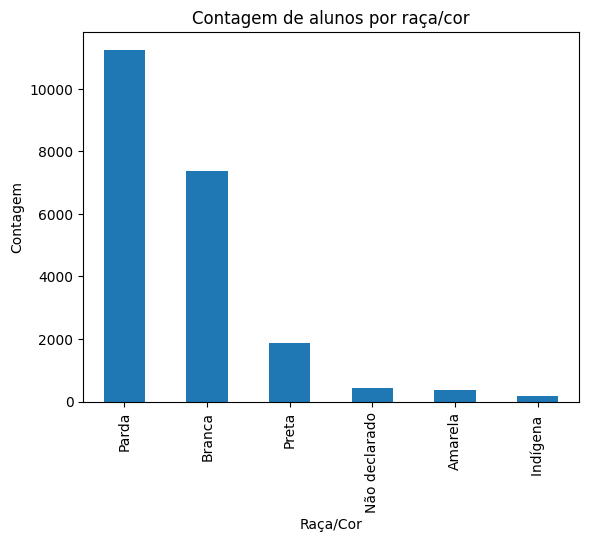

In [ ]:
# Análise da variável raça/cor
print("\nContagem de alunos por raça/cor:")
print(enem["TP_COR_RACA"].value_counts())

# Visualização gráfica
plt.figure()
enem["TP_COR_RACA"].value_counts().plot(kind="bar")
plt.title("Contagem de alunos por raça/cor")
plt.xlabel("Raça/Cor")
plt.ylabel("Contagem")
plt.show()


### Visualização da Distruibuição do tipo de escola que o aluno estudou

A análise da distribuição dos alunos por tipo de escola revelou que a maioria dos participantes (17.302 alunos) frequentou escolas públicas, enquanto um número significativamente menor de alunos (4.181) frequentou escolas privadas. Essa diferenciação entre os tipos de escola frequentados pelos participantes pode influenciar diversos aspectos do desempenho no ENEM, como acesso a recursos educacionais, qualidade do ensino e condições socioeconômicas dos estudantes. Observe a seguir:


Contagem de alunos por tipo de escola:
TP_ESCOLA
Pública    17302
Privada     4181
Name: count, dtype: int64


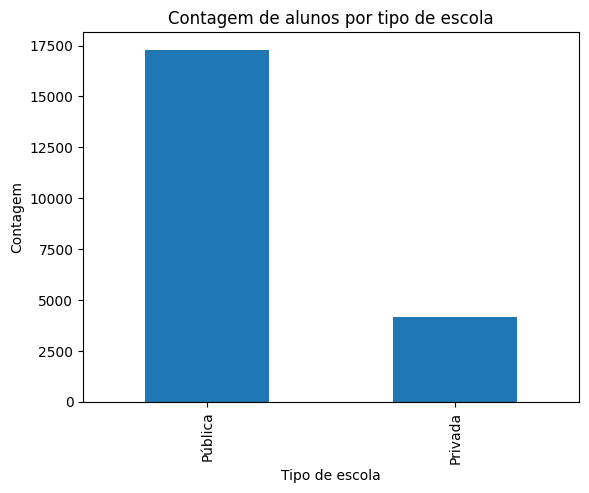

In [ ]:
# Análise da variável TP_ESCOLA
print("\nContagem de alunos por tipo de escola:")
print(enem["TP_ESCOLA"].value_counts())

# Visualização gráfica
plt.figure()
enem["TP_ESCOLA"].value_counts().plot(kind="bar")
plt.title("Contagem de alunos por tipo de escola")
plt.xlabel("Tipo de escola")
plt.ylabel("Contagem")
plt.show()


### Visualização da Distruibuição da dependência administrativa da escola

A análise da distribuição dos alunos por dependência administrativa da escola revelou que a maioria dos participantes (14.944 alunos) frequentou escolas estaduais, seguidas por escolas privadas, com 4.774 alunos. Um número significativo de alunos (1.698) frequentou escolas federais, enquanto apenas um pequeno número de alunos (67) frequentou escolas municipais. Gráfico abaixo:


Contagem de alunos por dependência administrativa da escola:
TP_DEPENDENCIA_ADM_ESC
Estadual     14944
Privada       4774
Federal       1698
Municipal       67
Name: count, dtype: int64


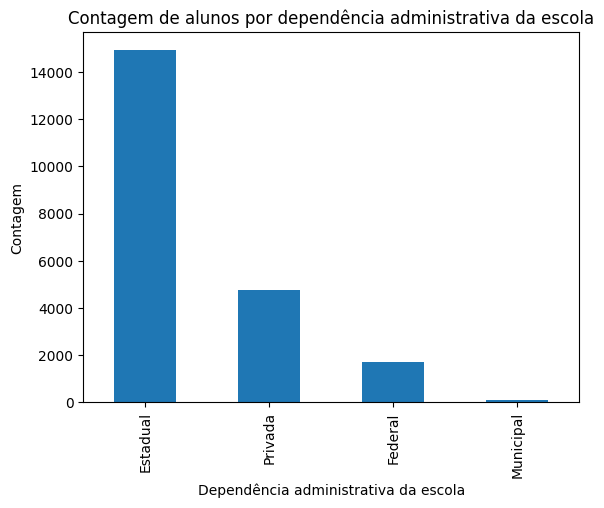

In [ ]:
# Análise da variável TP_DEPENDENCIA_ADM_ESC
print("\nContagem de alunos por dependência administrativa da escola:")
print(enem["TP_DEPENDENCIA_ADM_ESC"].value_counts())

# Visualização gráfica
plt.figure()
enem["TP_DEPENDENCIA_ADM_ESC"].value_counts().plot(kind="bar")
plt.title("Contagem de alunos por dependência administrativa da escola")
plt.xlabel("Dependência administrativa da escola")
plt.ylabel("Contagem")
plt.show()


### Visualização da Distruibuição da localização da escola do estudante

A análise da distribuição dos alunos por localização da escola revelou que a maioria dos participantes (20.885 alunos) frequentou escolas localizadas em áreas urbanas, enquanto um número menor de alunos (598) frequentou escolas localizadas em áreas rurais


Contagem de alunos por localização da escola:
TP_LOCALIZACAO_ESC
1.0    20885
2.0      598
Name: count, dtype: int64


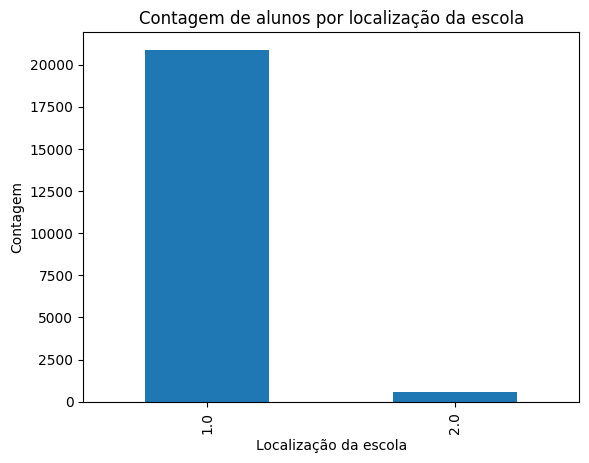

In [ ]:
# Análise da variável TP_LOCALIZACAO_ESC
print("\nContagem de alunos por localização da escola:")
print(enem["TP_LOCALIZACAO_ESC"].value_counts())

# Visualização gráfica
plt.figure()
enem["TP_LOCALIZACAO_ESC"].value_counts().plot(kind="bar")
plt.title("Contagem de alunos por localização da escola")
plt.xlabel("Localização da escola")
plt.ylabel("Contagem")
plt.show()


### Análise do resultado da prova

#### Análise da Prova de Ciências da Natureza

##### Visualização da Distribuição das Notas em Ciências da Natureza

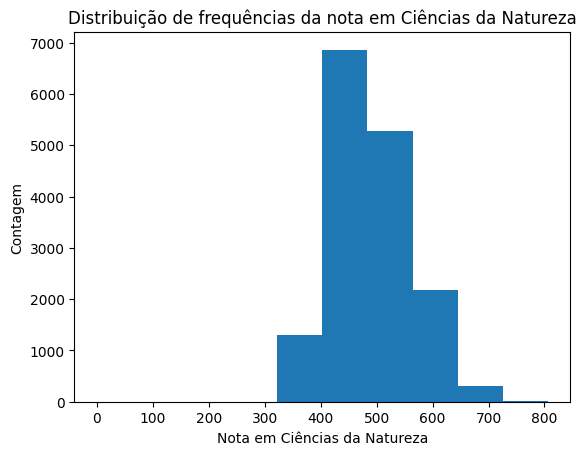

In [ ]:

# Análise exploratória da variável NU_NOTA_CN

# Visualização gráfica
plt.figure()
enem["NU_NOTA_CN"].plot(kind="hist")
plt.title("Distribuição de frequências da nota em Ciências da Natureza")
plt.xlabel("Nota em Ciências da Natureza")
plt.ylabel("Contagem")
plt.show()


O histograma mostra a distribuição de frequências das notas em Ciências da Natureza dos alunos do estado da Paraíba que participaram do ENEM.

A maioria dos alunos obteve notas entre 400 e 600 pontos, com um pico em torno de 500 pontos.

Um número significativo de alunos obteve notas abaixo de 400 pontos, enquanto um número menor de alunos obteve notas acima de 600 pontos.

A distribuição é assimétrica à direita, o que indica que há mais alunos com notas baixas do que alunos com notas altas.

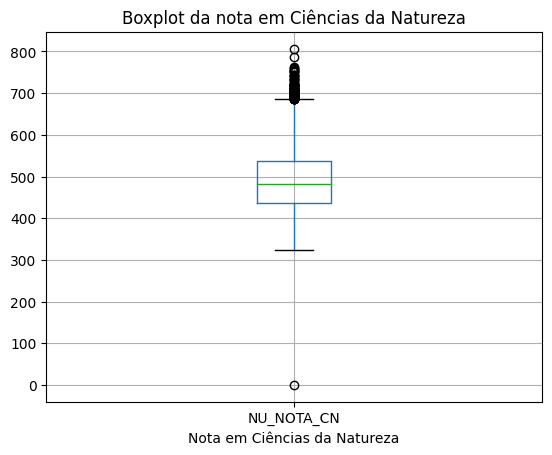

In [ ]:
# Boxplot
plt.figure()
enem.boxplot(column="NU_NOTA_CN", vert=True)
plt.title("Boxplot da nota em Ciências da Natureza")
plt.xlabel("Nota em Ciências da Natureza")
plt.show()


###### Explicação do boxplot:

- O boxplot apresenta a distribuição da nota em Ciências da Natureza dos alunos do estado da Paraíba que participaram do ENEM.
- A linha horizontal dentro da caixa representa a mediana, que é o valor que divide a distribuição em duas metades iguais.
- As bordas da caixa representam o primeiro e o terceiro quartis, que são os valores que dividem a distribuição em quatro partes iguais.
- As linhas que se estendem para fora da caixa representam os valores mínimo e máximo da distribuição.
- Os círculos fora do boxplot representam os outliers, que são valores que estão muito distantes da maioria dos dados.

###### A partir do boxplot, podemos observar que:

- A mediana da nota em Ciências da Natureza é de aproximadamente 490 pontos.
- A maioria dos alunos obteve notas entre 400 e 600 pontos.
- Um número significativo de alunos obteve notas abaixo de 400 pontos, enquanto um número menor de alunos obteve notas acima de 600 pontos.
- Há alguns outliers, que são alunos que obtiveram notas muito baixas ou muito altas.

##### Medidas de Centralidade para Nota em Ciências da Natureza

---



In [ ]:
# Medidas descritivas
print("\nMedidas descritivas da nota em Ciências da Natureza:")
print("Nota Máxima: ", enem["NU_NOTA_CN"].max())
print("Nota Mínima: ", enem["NU_NOTA_CN"].min())
print("Mediana: ",enem["NU_NOTA_CN"].median())
print("Média: ",enem["NU_NOTA_CN"].mean())



Medidas descritivas da nota em Ciências da Natureza:
Nota Máxima:  806.1
Nota Mínima:  0.0
Mediana:  481.4
Média:  490.33575636044617


- **Nota Máxima**: A nota mais alta obtida pelos alunos na área de Ciências da Natureza foi de 806.1 pontos. Isso indica o desempenho mais alto alcançado pelos alunos nessa área.
- **Nota Mínima:** A nota mais baixa registrada na área de Ciências da Natureza foi de 0.0 pontos. Isso representa o desempenho mais baixo entre todos os participantes.
- **Mediana:** A mediana das notas em Ciências da Natureza foi de 481.4 pontos. Isso significa que metade dos alunos obteve notas iguais ou superiores a esse valor, e a outra metade obteve notas iguais ou inferiores.
- **Média:** A média das notas em Ciências da Natureza foi de aproximadamente 490.34 pontos. Essa é a média aritmética de todas as notas obtidas pelos alunos nessa área.

##### Medidas de Dispersão para Nota em Ciências da Natureza

In [ ]:
variancia = enem['NU_NOTA_CN'].var()
desvio_padrao = enem['NU_NOTA_CN'].std()

media = enem['NU_NOTA_CN'].mean()
coeficiente_variacao = desvio_padrao / media

q1 = enem['NU_NOTA_CN'].quantile(0.25)
q3 = enem['NU_NOTA_CN'].quantile(0.75)
iqr = q3 - q1

print("Variância: ", variancia)
print("Desvio Padrão: ", desvio_padrao)
print("Coeficiente de variação: ", coeficiente_variacao)
print("IQR: ", iqr)

Variância:  4671.926460952605
Desvio Padrão:  68.35149201701896
Coeficiente de variação:  0.13939732342663122
IQR:  99.375


- **Variância:** Com uma variância de aproximadamente 4671.93, as notas em Ciências da Natureza demonstram uma dispersão considerável em relação à média, indicando uma diversidade significativa nos resultados dos alunos nessa área do ENEM.
- **Desvio Padrão:** O desvio padrão de cerca de 68.35 aponta para uma dispersão moderada das notas em relação à média de aproximadamente 490.34. Isso sugere que os resultados dos alunos em Ciências da Natureza estão relativamente próximos da média, mas ainda apresentam alguma variabilidade.
- **Coeficiente de Variação:** Com um coeficiente de variação de aproximadamente 0.139, o desvio padrão representa cerca de 13.9% da média. Isso indica uma variabilidade relativamente baixa em relação à média, o que sugere uma certa consistência nos resultados dos alunos nessa disciplina.
- **IQR (Amplitude Interquartil):** Uma IQR de cerca de 99.375 indica que a metade central das notas está contida em um intervalo de aproximadamente 99.375 pontos. Isso sugere uma consistência razoável nas notas dentro deste intervalo, embora ainda haja alguma variação nos resultados dos alunos

#### Análise da Prova de Ciências Humanas

##### Visualização da Distribuição das Notas em Ciências Humanas

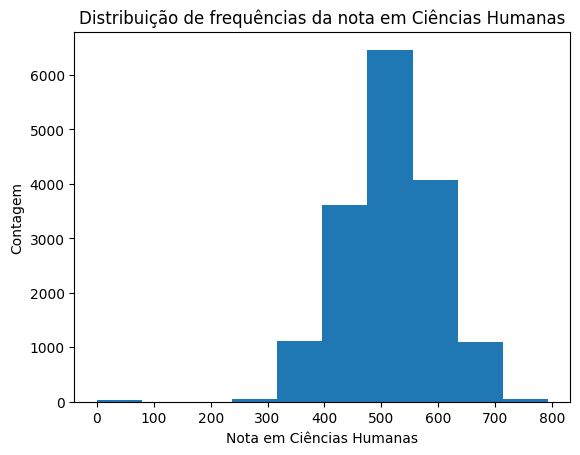

In [ ]:
# Análise exploratória da variável NU_NOTA_CH

# Visualização gráfica
plt.figure()
enem["NU_NOTA_CH"].plot(kind="hist")
plt.title("Distribuição de frequências da nota em Ciências Humanas")
plt.xlabel("Nota em Ciências Humanas")
plt.ylabel("Contagem")
plt.show()

O histograma mostra a distribuição de frequências das notas em Ciências Humanas dos alunos do estado da Paraíba que participaram do ENEM.

A maioria dos alunos obteve notas entre 400 e 600 pontos, com um pico em torno de 500 pontos.

Um número significativo de alunos obteve notas abaixo de 400 pontos, enquanto um número menor de alunos obteve notas acima de 600 pontos.

A distribuição é assimétrica à direita, o que indica que há mais alunos com notas baixas do que alunos com notas altas.

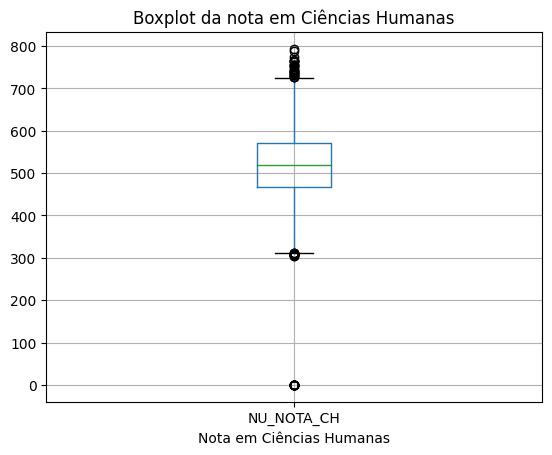

In [ ]:
# Boxplot
plt.figure()
enem.boxplot(column="NU_NOTA_CH", vert=True)
plt.title("Boxplot da nota em Ciências Humanas")
plt.xlabel("Nota em Ciências Humanas")
plt.show()

A partir do boxplot, podemos observar que:
- A mediana da nota em Ciências Humanas é de aproximadamente 500 pontos.
- A maioria dos alunos obteve notas entre 400 e 600 pontos.
- Um número significativo de alunos obteve notas abaixo de 400 pontos, enquanto um número menor de alunos obteve notas acima de 600 pontos.
- Há alguns outliers, que são alunos que obtiveram notas muito baixas ou muito altas.

##### Medidas de Centralidade para Nota em Ciências Humanas




In [ ]:
# Medidas descritivas
print("\nMedidas descritivas da nota em Ciências Humanas:")
print("Nota Máxima: ", enem["NU_NOTA_CH"].max())
print("Nota Mínima: ", enem["NU_NOTA_CH"].min())
print("Mediana: ",enem["NU_NOTA_CH"].median())
print("Média: ",enem["NU_NOTA_CH"].mean())


Medidas descritivas da nota em Ciências Humanas:
Nota Máxima:  793.0
Nota Mínima:  0.0
Mediana:  518.4
Média:  516.8405916585839


- **Nota Máxima:** A nota mais alta obtida pelos alunos na área de Ciências Humanas foi de 793.0 pontos. Isso representa o desempenho mais alto alcançado pelos alunos nessa área específica do ENEM.
- **Nota Mínima:** A nota mais baixa registrada na área de Ciências Humanas foi de 0.0 pontos. Isso indica o desempenho mais baixo entre todos os participantes nessa disciplina.
- **Mediana:** A mediana das notas em Ciências Humanas foi de 518.4 pontos. Isso significa que metade dos alunos obteve notas iguais ou superiores a esse valor, enquanto a outra metade obteve notas iguais ou inferiores.
- **Média:** A média das notas em Ciências Humanas foi de aproximadamente 516.84 pontos. Essa é a média aritmética de todas as notas obtidas pelos alunos nessa área específica do ENEM.

##### Medidas de Dispersão para Nota em Ciências Humanas

In [ ]:
variancia = enem['NU_NOTA_CH'].var()
desvio_padrao = enem['NU_NOTA_CH'].std()

media = enem['NU_NOTA_CH'].mean()
coeficiente_variacao = desvio_padrao / media

q1 = enem['NU_NOTA_CH'].quantile(0.25)
q3 = enem['NU_NOTA_CH'].quantile(0.75)
iqr = q3 - q1

print("Variância: ", variancia)
print("Desvio Padrão: ", desvio_padrao)
print("Coeficiente de variação: ", coeficiente_variacao)
print("IQR: ", iqr)

Variância:  6595.582455278897
Desvio Padrão:  81.21319138710716
Coeficiente de variação:  0.15713392620050867
IQR:  104.125


- **Variância:** A variância de aproximadamente 6595.58 indica que as notas em Ciências Humanas estão amplamente dispersas em relação à média, sugerindo uma grande variabilidade no desempenho dos alunos nesta disciplina.
- **Desvio Padrão:** Com um desvio padrão de aproximadamente 81.21, as notas em Ciências Humanas estão relativamente dispersas em relação à média de aproximadamente 516.84. Isso indica uma variação considerável nos resultados dos alunos.
- C**oeficiente de Variação:** Com um coeficiente de variação de aproximadamente 0.157, o desvio padrão representa cerca de 15.7% da média. Isso indica uma variabilidade moderada nas notas em relação à média.
- **IQR (Amplitude Interquartil):** Uma IQR de aproximadamente 104.125 indica que a metade central das notas está contida em um intervalo de cerca de 104.125 pontos. Isso sugere uma consistência relativamente estável nas notas dentro deste intervalo.

#### Análise da Prova de Linguagens e Códigos

##### Visualização da Distribuição das Notas em Linguagens e Códigos





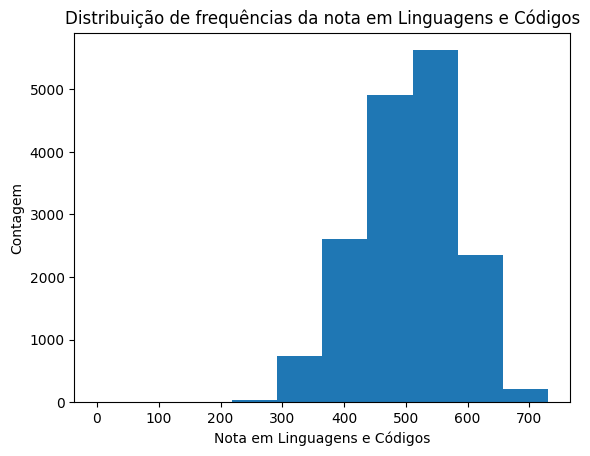

In [ ]:
# Análise exploratória da variável NU_NOTA_LC

# Visualização gráfica
plt.figure()
enem["NU_NOTA_LC"].plot(kind="hist")
plt.title("Distribuição de frequências da nota em Linguagens e Códigos")
plt.xlabel("Nota em Linguagens e Códigos")
plt.ylabel("Contagem")
plt.show()

O histograma mostra a distribuição de frequências das notas em Linguagens e Códigos dos alunos do estado da Paraíba que participaram do ENEM.

A maioria dos alunos obteve notas entre 450 e proximo de 570 pontos, com um pico em torno de 500 pontos.

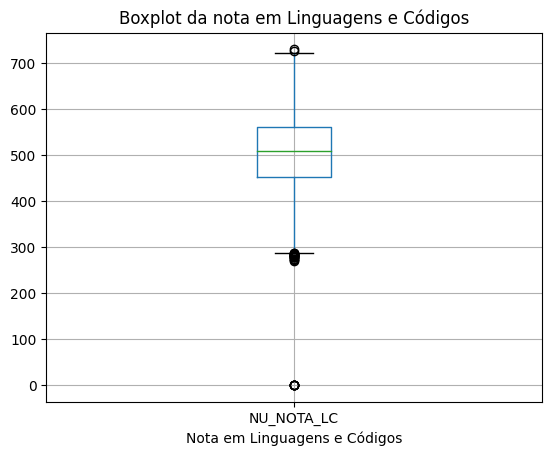

In [ ]:
# Boxplot
plt.figure()
enem.boxplot(column="NU_NOTA_LC", vert=True)
plt.title("Boxplot da nota em Linguagens e Códigos")
plt.xlabel("Nota em Linguagens e Códigos")
plt.show()

A mediana da nota em Linguagens e Códigos é de aproximadamente 500 pontos.
A maioria dos alunos obteve notas entre 450 e 570 pontos.
Um número significativo de alunos obteve notas abaixo de 450 pontos, enquanto um número menor de alunos obteve notas acima de 570 pontos.
Há alguns outliers, que são alunos que obtiveram notas muito baixas ou muito altas.

##### Medidas de Centralidade para Notas em Linguagens e Códigos

In [ ]:
# Medidas descritivas
print("\nMedidas descritivas da nota em Linguagens e Código:")
print("Nota Máxima: ", enem["NU_NOTA_LC"].max())
print("Nota Mínima: ", enem["NU_NOTA_LC"].min())
print("Mediana: ",enem["NU_NOTA_LC"].median())
print("Média: ",enem["NU_NOTA_LC"].mean())


Medidas descritivas da nota em Linguagens e Código:
Nota Máxima:  729.8
Nota Mínima:  0.0
Mediana:  510.2
Média:  504.35668040737147


**Nota Máxima:** A nota mais alta obtida pelos alunos na área de Linguagens e Códigos foi de 729.8 pontos. Isso representa o desempenho mais alto alcançado pelos alunos nessa área específica do ENEM.

**Nota Mínima:** A nota mais baixa registrada na área de Linguagens e Códigos foi de 0.0 pontos. Isso indica o desempenho mais baixo entre todos os participantes nessa disciplina.

**Mediana:** A mediana das notas em Linguagens e Códigos foi de 510.2 pontos. Isso significa que metade dos alunos obteve notas iguais ou superiores a esse valor, enquanto a outra metade obteve notas iguais ou inferiores.

**Média:** A média das notas em Linguagens e Códigos foi de aproximadamente 504.36 pontos. Essa é a média aritmética de todas as notas obtidas pelos alunos nessa área específica do ENEM.

##### Medidas de Dispersão para Notas em Linguagens e Códigos

In [ ]:
variancia = enem['NU_NOTA_LC'].var()
desvio_padrao = enem['NU_NOTA_LC'].std()

media = enem['NU_NOTA_LC'].mean()
coeficiente_variacao = desvio_padrao / media

q1 = enem['NU_NOTA_LC'].quantile(0.25)
q3 = enem['NU_NOTA_LC'].quantile(0.75)
iqr = q3 - q1

print("Variância: ", variancia)
print("Desvio Padrão: ", desvio_padrao)
print("Coeficiente de variação: ", coeficiente_variacao)
print("IQR: ", iqr)

Variância:  6112.29591293235
Desvio Padrão:  78.18117364770339
Coeficiente de variação:  0.15501167464373836
IQR:  109.30000000000001


- **Variância:** A variância de aproximadamente 6112.29 indica que as notas em Linguagens e Códigos estão amplamente dispersas em relação à média, sugerindo uma grande variabilidade no desempenho dos alunos nesta disciplina.
- **Desvio Padrão:** Com um desvio padrão de aproximadamente 78.17, as notas em Linguagens e Códigos estão relativamente dispersas em relação à média de aproximadamente 504.36. Isso indica uma variação considerável nos resultados dos alunos.
- **Coeficiente de Variação:** Com um coeficiente de variação de aproximadamente 0.154, o desvio padrão representa cerca de 15.4% da média. Isso indica uma variabilidade moderada nas notas em relação à média.
- **IQR (Amplitude Interquartil):** Uma IQR de aproximadamente 109.2 indica que a metade central das notas está contida em um intervalo de cerca de 109.2 pontos. Isso sugere uma consistência relativamente estável nas notas dentro deste intervalo.

#### Análise da Nota em Redação

##### Visualização da Distribuição das Notas em Redação

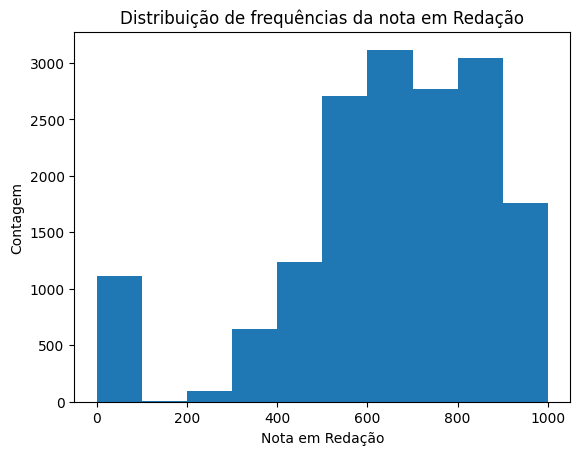

In [ ]:
# Análise exploratória da variável NU_NOTA_REDACAO

# Visualização gráfica
plt.figure()
enem["NU_NOTA_REDACAO"].plot(kind="hist")
plt.title("Distribuição de frequências da nota em Redação")
plt.xlabel("Nota em Redação")
plt.ylabel("Contagem")
plt.show()

- A maioria dos alunos obteve notas entre 500 e 900 pontos, com um pico em torno de 600 a 700 pontos.
- Um número significativo de alunos obteve notas abaixo de 500 pontos, enquanto um número menor de alunos obteve notas acima de 900 pontos.
- A distribuição esta para a frequencia das notas sendo maior que 500 pontos.

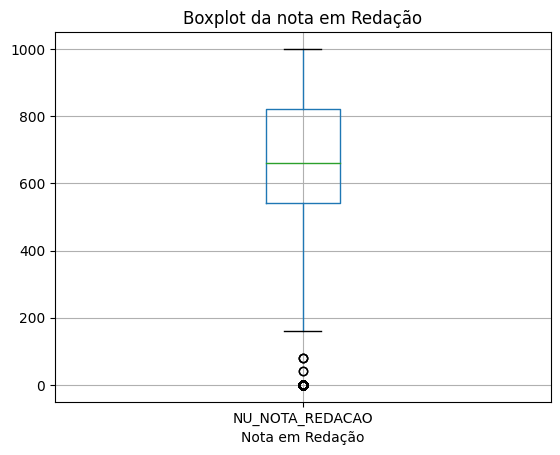

In [ ]:
# Boxplot
plt.figure()
enem.boxplot(column="NU_NOTA_REDACAO", vert=True)
plt.title("Boxplot da nota em Redação")
plt.xlabel("Nota em Redação")
plt.show()

A partir do boxplot, podemos observar que:

- A mediana da nota em redação é de aproximadamente entre 600 e 700 pontos.
- A maioria dos alunos obteve notas entre 500 e 700 pontos.
- Um número significativo de alunos obteve notas abaixo de 500 pontos, enquanto um número menor de alunos obteve notas acima de 700 pontos.
- Há alguns outliers, que são alunos que obtiveram notas muito baixas.

##### Medidas de Centralidade para Notas em Redação

In [ ]:
# Medidas descritivas
print("\nMedidas descritivas da nota em Redação:")
print("Nota Máxima: ", enem["NU_NOTA_REDACAO"].max())
print("Nota Mínima: ", enem["NU_NOTA_REDACAO"].min())
print("Mediana: ",enem["NU_NOTA_REDACAO"].median())
print("Média: ",enem["NU_NOTA_REDACAO"].mean())


Medidas descritivas da nota em Redação:
Nota Máxima:  1000.0
Nota Mínima:  0.0
Mediana:  660.0
Média:  637.171435499515


- **Nota Máxima:** A nota mais alta obtida pelos alunos na área de Redação foi de 1000.0 pontos. Isso representa o desempenho mais alto alcançado pelos alunos na Redação do ENEM.
- **Nota Mínima:** A nota mais baixa registrada na área de Redação foi de 0.0 pontos. Isso indica o desempenho mais baixo entre todos os participantes.
- **Mediana:** A mediana das notas em Redação foi de 660.0 pontos. Isso significa que metade dos alunos obteve notas iguais ou superiores a esse valor, enquanto a outra metade obteve notas iguais ou inferiores.
- **Média:** A média das notas em Redação foi de aproximadamente 637.16 pontos. Essa é a média aritmética de todas as notas obtidas pelos alunos na Redação do ENEM.
- **Observação:** A média e a mediana são muito próximas, o que indica que a distribuição das notas em Redação é relativamente simétrica. Isso significa que a maioria das notas está concentrada em torno da média e da mediana.


##### Medidas de Dispersão para Notas em Redação

In [ ]:
variancia = enem['NU_NOTA_REDACAO'].var()
desvio_padrao = enem['NU_NOTA_REDACAO'].std()

media = enem['NU_NOTA_REDACAO'].mean()
coeficiente_variacao = desvio_padrao / media

q1 = enem['NU_NOTA_REDACAO'].quantile(0.25)
q3 = enem['NU_NOTA_REDACAO'].quantile(0.75)
iqr = q3 - q1

print("Variância: ", variancia)
print("Desvio Padrão: ", desvio_padrao)
print("Coeficiente de variação: ", coeficiente_variacao)
print("IQR: ", iqr)

Variância:  54640.92265416231
Desvio Padrão:  233.75397890552003
Coeficiente de variação:  0.36686198702907474
IQR:  280.0


**Variância:** A variância das notas em Redação é de aproximadamente 54640.8. Isso indica que as notas estão relativamente dispersas em torno da média. Em outras palavras, há uma grande variação nas notas dos alunos em Redação.

**Desvio Padrão:** O desvio padrão das notas em Redação é de aproximadamente 233.7. Isso significa que a maioria das notas está dentro de um intervalo de aproximadamente 233.7 pontos acima e abaixo da média.

**Coeficiente de Variação:** O coeficiente de variação das notas em Redação é de aproximadamente 0.367. Isso indica que o desvio padrão representa cerca de 36.7% da média. Isso sugere que a dispersão das notas em relação à média é moderada.

**IQR (Amplitude Interquartil):** A IQR das notas em Redação é de aproximadamente 280.0 pontos. Isso significa que a metade central das notas está contida em um intervalo de 280.0 pontos. Isso sugere que há uma consistência razoável nas notas dentro deste intervalo, embora ainda haja alguma variação nos resultados dos alunos.

Em resumo, as medidas de dispersão das notas em Redação indicam que há uma grande variação nas notas dos alunos. Isso significa que alguns alunos obtiveram notas muito altas, enquanto outros obtiveram notas muito baixas. No entanto, a maioria das notas está concentrada em torno da média, o que sugere que a distribuição das notas é relativamente simétrica.

#### Análise da Nota Geral

##### Visualização da Distribuição das Notas Gerais

In [ ]:
enem['MEDIA_GERAL'] = enem[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT']].sum(axis=1) / 4


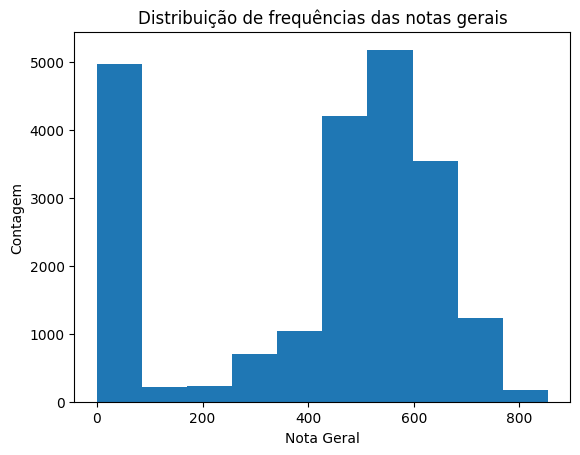

In [ ]:
# Visualização gráfica da distribuição das notas gerais
plt.figure()
enem["MEDIA_GERAL"].plot(kind="hist")
plt.title("Distribuição de frequências das notas gerais")
plt.xlabel("Nota Geral")
plt.ylabel("Contagem")
plt.show()


 O histograma mostra a distribuição de frequências das notas gerais dos alunos do estado da Paraíba que participaram do ENEM.

 A maioria dos alunos obteve notas entre 400 e 600 pontos, com um pico em torno de 500 pontos.

 Um número significativo de alunos obteve notas abaixo de 400 pontos, enquanto um número menor de alunos obteve notas acima de 600 pontos.

 O pico no 0 indica que há um número considerável de alunos que obtiveram nota zero na prova do ENEM. Isso pode ser devido a diversos fatores, como falta de preparo, ausência no dia da prova ou anulação da prova por algum motivo.

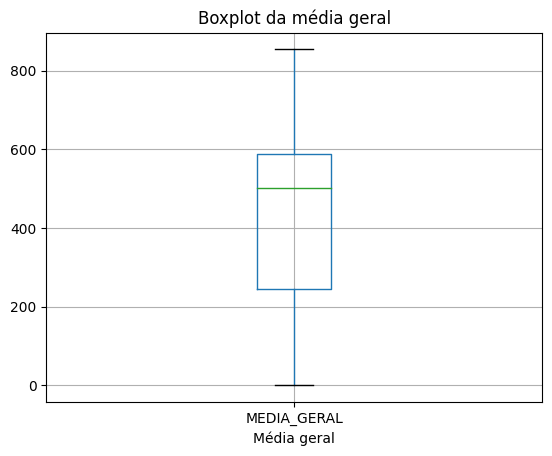

In [ ]:
plt.figure()
enem.boxplot(column="MEDIA_GERAL", vert=True)
plt.title("Boxplot da média geral")
plt.xlabel("Média geral")
plt.show()

A mediana da média geral é de aproximadamente 490 pontos.

A maioria dos alunos obteve notas entre 400 e 600 pontos.

Um número significativo de alunos obteve notas abaixo de 400 pontos, enquanto um número menor de alunos obteve notas acima de 600 pontos.

Há alguns outliers, que são alunos que obtiveram notas muito baixas ou muito altas.

##### Medidas de Centralidade para Notas Gerais


In [ ]:
# Medidas descritivas
print("\nMedidas descritivas da nota Geral:")
print("Nota Máxima: ", enem["MEDIA_GERAL"].max())
print("Nota Mínima: ", enem["MEDIA_GERAL"].min())
print("Mediana: ",enem["MEDIA_GERAL"].median())
print("Média: ",enem["MEDIA_GERAL"].mean())


Medidas descritivas da nota Geral:
Nota Máxima:  853.7249999999999
Nota Mínima:  0.0
Mediana:  501.85
Média:  411.2119326909649


##### Medidas de Dispersão para Notas Gerais

In [ ]:
variancia = enem['MEDIA_GERAL'].var()
desvio_padrao = enem['MEDIA_GERAL'].std()

media = enem['MEDIA_GERAL'].mean()
coeficiente_variacao = desvio_padrao / media

q1 = enem['MEDIA_GERAL'].quantile(0.25)
q3 = enem['MEDIA_GERAL'].quantile(0.75)
iqr = q3 - q1

print("Variância: ", variancia)
print("Desvio Padrão: ", desvio_padrao)
print("Coeficiente de variação: ", coeficiente_variacao)
print("IQR: ", iqr)

Variância:  61549.381046099275
Desvio Padrão:  248.09147717343956
Coeficiente de variação:  0.6033177966162911
IQR:  344.42500000000007


## Questões socieconômicas

A análise das notas dos alunos no Exame Nacional do Ensino Médio (ENEM) não se limita apenas ao desempenho acadêmico; diversos fatores socioeconômicos também desempenham um papel significativo na determinação das pontuações dos estudantes.

Questões como o nível de escolaridade dos pais, a renda familiar, o tipo de escola frequentada e a localização geográfica podem influenciar diretamente o desempenho dos alunos no exame.

O contexto socioeconômico de cada aluno pode afetar sua acessibilidade a recursos educacionais, seu acesso a apoio escolar adicional, sua motivação e até mesmo sua saúde emocional. Portanto, é crucial compreender como esses fatores externos podem impactar as pontuações obtidas pelos alunos em diferentes áreas do ENEM.

### Visualização dos fatores sociecônomicos

#### Renda mensal da família

A questão sobre a renda familiar dos participantes do ENEM oferece uma visão abrangente da situação socioeconômica desses alunos. As opções de resposta abrangem uma ampla variedade de faixas de renda, refletindo a diversidade de contextos financeiros dos candidatos. O gráfico abaixo ilustra essa distribuição:

##### Visualização da Distribuição da Renda Familiar


Contagem da distribuição da renda familiar
Q006
1045.0     9825
1567.5     2987
0.0        2214
2090.0     1865
2612.5     1052
4180.0      680
5225.0      659
3135.0      597
20001.0     309
6270.0      283
7315.0      202
9405.0      188
10450.0     185
12540.0     152
8360.0      147
15675.0     138
Name: count, dtype: int64


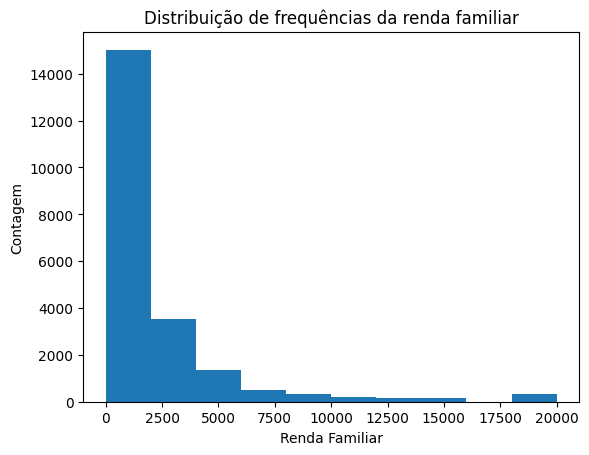

In [ ]:
print("\nContagem da distribuição da renda familiar")
print(enem["Q006"].value_counts())

enem['Q006'] = enem['Q006'].replace([np.inf], 20001)
enem['Q006'] = enem['Q006'].apply(lambda x: min(x, 20001))

plt.figure()
enem["Q006"].plot(kind="hist")
plt.title("Distribuição de frequências da renda familiar")
plt.xlabel("Renda Familiar")
plt.ylabel("Contagem")
plt.show()


- Opção A - Nenhuma renda: Esta faixa de renda teve 2.214 respostas, indicando que uma parte significativa dos participantes vem de famílias com renda muito baixa.
- Opção B - De 0,00 a 1.045,00: Esta foi a faixa de renda mais comum, com 9.825 respostas. Isso sugere que a maioria dos participantes está em famílias com renda de até um salário mínimo.
- Opção C - De 1.045,00 a 1.567,50: Com 2.987 respostas, essa faixa indica uma proporção considerável de participantes com renda ligeiramente acima do salário mínimo.
- Opção D - De 1.567,50 a 2.090,00: Esta faixa teve 1.865 respostas, mostrando que ainda há uma quantidade significativa de participantes com renda próxima ao salário mínimo.
- Opção E - De 2.090,00 a 2.612,50: Com 1.052 respostas, esta faixa indica uma proporção menor de participantes com renda ligeiramente mais alta.
- Opção F - De 2.612,50 a 3.135,00: Com 597 respostas, esta faixa mostra uma diminuição na quantidade de participantes à medida que a renda familiar aumenta.
- Opção G - De 3.135,00 a 4.180,00: Esta faixa teve 680 respostas, refletindo uma proporção ainda menor de participantes com renda mais alta.
- Opção H - De 4.180,00 a 5.225,00: Com 659 respostas, essa faixa indica uma diminuição gradual no número de participantes à medida que a renda familiar aumenta.
- Opção I - De 5.225,00 a 6.270,00: Com 283 respostas, esta faixa representa uma proporção ainda menor de participantes com renda mais alta.
- Opção J - De 6.270,00 a 7.315,00: Com 202 respostas, esta faixa mostra uma diminuição adicional na quantidade de participantes à medida que a renda familiar aumenta.
- Opção K - De 7.315,00 a 8.360,00: Com 147 respostas, esta faixa reflete uma proporção muito pequena de participantes com renda mais alta.
- Opção L - De 8.360,00 a 9.405,00: Com 188 respostas, esta faixa indica uma diminuição na quantidade de participantes à medida que a renda familiar aumenta.
- Opção M - De 9.405,00 a 10.450,00: Com 185 respostas, esta faixa mostra uma proporção ainda menor de participantes com renda mais alta.
- Opção N - De 10.450,00 a 12.540,00: Com 152 respostas, esta faixa representa uma diminuição adicional na quantidade de participantes à medida que a renda familiar aumenta.
- Opção O - De 12.540,00 a 15.675,00: Com 138 respostas, esta faixa reflete uma proporção muito pequena de participantes com renda mais alta.
- Opção P - De 15.675,00 a 20.900,00: Com 149 respostas, esta faixa mostra uma diminuição na quantidade de participantes à medida que a renda familiar aumenta.
- Opção Q - Acima de 20.900,00: Com 160 respostas, esta faixa representa uma proporção ainda menor de participantes com renda mais alta.

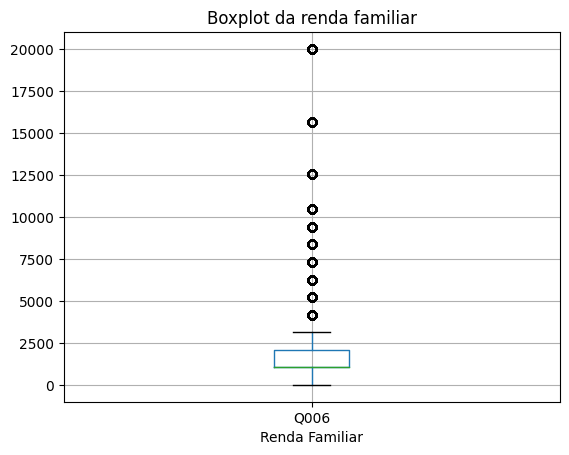

In [ ]:
plt.figure()
enem.boxplot(column="Q006", vert=True)
plt.title("Boxplot da renda familiar")
plt.xlabel("Renda Familiar")
plt.show()

O boxplot mostra a distribuição da renda familiar dos alunos que participaram do ENEM.

 - A mediana da renda familiar está na faixa de R$ 1.045,00 a R$ 1.567,50.

- O primeiro quartil (Q1) está na faixa de R$ 0,00 a R$ 1.045,00.

- O terceiro quartil (Q3) está na faixa de R$ 2.090,00 a R$ 2.612,50.

- Os limites inferior e superior são R$ 0,00 e R$ 20.900,00, respectivamente.

- Há alguns outliers, que são participantes com renda familiar muito alta ou muito baixa.


##### Medidas de Centralidade da Renda Familiar

In [ ]:
# Medidas descritivas
print("\nMedidas descritivas da renda familiar:")
print("Renda Familiar Máxima: ", enem["Q006"].max())
print("Renda Familiar Mínima: ", enem["Q006"].min())
print("Mediana: ",enem["Q006"].median())
print("Média: ",enem["Q006"].mean())


Medidas descritivas da renda familiar:
Renda Familiar Máxima:  20001.0
Renda Familiar Mínima:  0.0
Mediana:  1045.0
Média:  2242.9179583857003


- Renda Máxima: 20001.0 (suponho que este seja o valor máximo definido para renda, provavelmente para valores acima de 20000).
- Renda Mínima: 0.0 (o menor valor de renda observado).
- Mediana: 1045.0 (a metade dos valores de renda estão abaixo e a outra metade estão acima deste valor).
- Média: 2242.92 (a média de todos os valores de renda observados).

##### Medidads de Ddispersão da Renda Familiar

In [ ]:
variancia = enem['Q006'].var()
desvio_padrao = enem['Q006'].std()

media = enem['Q006'].mean()
coeficiente_variacao = desvio_padrao / media

q1 = enem['Q006'].quantile(0.25)
q3 = enem['Q006'].quantile(0.75)
iqr = q3 - q1

print("Variância: ", variancia)
print("Desvio Padrão: ", desvio_padrao)
print("Coeficiente de variação: ", coeficiente_variacao)
print("IQR: ", iqr)

Variância:  9846504.17983203
Desvio Padrão:  3137.9139854100576
Coeficiente de variação:  1.3990319947629803
IQR:  1045.0


- Variância: 9846504.18 (uma medida da dispersão dos valores de renda em relação à média; quanto maior o valor, maior é a dispersão dos dados em torno da média).
- Desvio Padrão: 3137.91 (uma medida de dispersão que indica o quanto os valores de renda estão distantes da média; um desvio padrão maior indica uma maior dispersão dos dados).
- Coeficiente de Variação: 1.399 (uma medida de variabilidade relativa em relação à média; um valor maior indica uma maior variabilidade relativa dos dados em relação à média).
- IQR (Intervalo Interquartil): 1045.0 (a diferença entre o primeiro quartil Q1 e o terceiro quartil Q3; representa a dispersão dos valores de renda em torno da mediana; quanto maior o valor, maior é a dispersão).

#### Quantidade de carros na residência do candidato


A questão sobre a quantidade de carros na residência do candidato oferece insights importantes sobre a situação socioeconômica dos participantes do ENEM. As opções de resposta abrangem desde aqueles que não possuem carro até aqueles que possuem quatro ou mais veículos. Essa variedade de respostas reflete as diferentes realidades e estilos de vida dos candidatos. Observe a distribuição das respostas no gráfico abaixo:


Contagem da quantidade de carros na residência do candidato:
Q010
A    13814
B     6503
C     1020
D      114
E       32
Name: count, dtype: int64


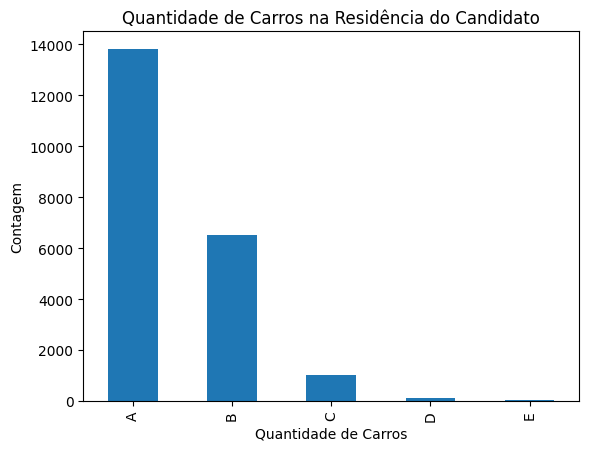

In [ ]:
print("\nContagem da quantidade de carros na residência do candidato:")
print(enem["Q010"].value_counts())

# Visualização gráfica
plt.figure()
enem["Q010"].value_counts().plot(kind="bar")
plt.title("Quantidade de Carros na Residência do Candidato")
plt.xlabel("Quantidade de Carros")
plt.ylabel("Contagem")
plt.show()


- Opção A - Não: Esta foi a opção mais selecionada, com 13.814 respostas. Isso sugere que a maioria dos candidatos não possui carro em suas residências.
- Opção B - Sim, um: Esta opção teve 6.503 respostas, indicando que uma parcela significativa dos candidatos possui um carro em suas residências.
- Opção C - Sim, dois: Com 1.020 respostas, esta opção sugere que uma proporção menor de candidatos possui dois carros em suas residências.
- Opção D - Sim, três: Com 114 respostas, esta opção indica que uma proporção ainda menor de candidatos possui três carros em suas residências.
- Opção E - Sim, quatro ou mais: Com apenas 32 respostas, esta opção reflete uma proporção muito pequena de candidatos que possuem quatro ou mais carros em suas residências.

#### Quantidade de motocicletas na residência do candidato


A questão sobre a presença de motocicletas na residência do candidato oferece uma visão valiosa da realidade socioeconômica dos participantes do ENEM. As opções de resposta variam desde aqueles que não possuem motocicleta até aqueles que possuem quatro ou mais. Essa diversidade de respostas reflete diferentes situações de mobilidade e recursos financeiros entre os candidatos. Vamos analisar a distribuição dessas respostas no gráfico abaixo:


Contagem da quantidade de motocicletas na residência do candidato:
Q011
A    14068
B     6617
C      719
D       58
E       21
Name: count, dtype: int64


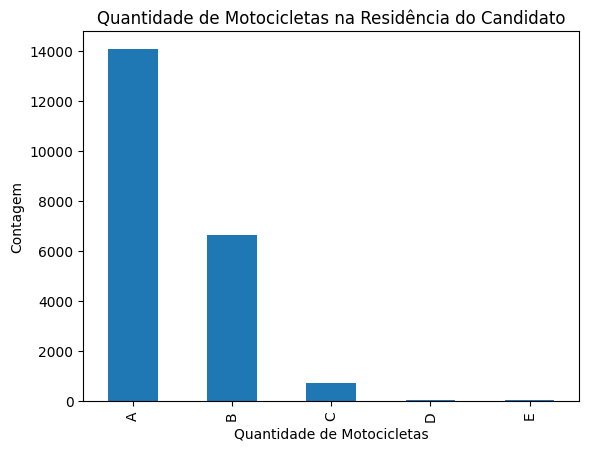

In [ ]:
print("\nContagem da quantidade de motocicletas na residência do candidato:")
print(enem["Q011"].value_counts())

# Visualização gráfica
plt.figure()
enem["Q011"].value_counts().plot(kind="bar")
plt.title("Quantidade de Motocicletas na Residência do Candidato")
plt.xlabel("Quantidade de Motocicletas")
plt.ylabel("Contagem")
plt.show()


- Opção A - Não: Esta foi a opção mais selecionada, com 14.068 respostas. Isso sugere que a maioria dos candidatos não possui motocicleta em suas residências.
- Opção B - Sim, uma: Com 6.617 respostas, esta opção indica que uma parcela significativa dos candidatos possui uma motocicleta em suas residências.
- Opção C - Sim, duas: Com 719 respostas, essa opção sugere que uma proporção menor de candidatos possui duas motocicletas em suas residências.
- Opção D - Sim, três: Com 58 respostas, esta opção indica que uma proporção ainda menor de candidatos possui três motocicletas em suas residências.
- Opção E - Sim, quatro ou mais: Com apenas 21 respostas, esta opção reflete uma proporção muito pequena de candidatos que possuem quatro ou mais motocicletas em suas residências.

#### Nível de escolaridade do pai ou homem responsável

A questão sobre o nível de escolaridade do pai ou do homem responsável fornece insights valiosos sobre o contexto educacional dos alunos participantes do ENEM. As opções de resposta abrangem uma ampla gama de níveis educacionais, desde aqueles que nunca estudaram até aqueles que concluíram a pós-graduação. Observe o gráfico abaixo:


Contagem das repostas dos alunos
Q001
E    5084
B    4705
C    3007
D    2325
H    2299
A    1480
F    1411
G    1172
Name: count, dtype: int64


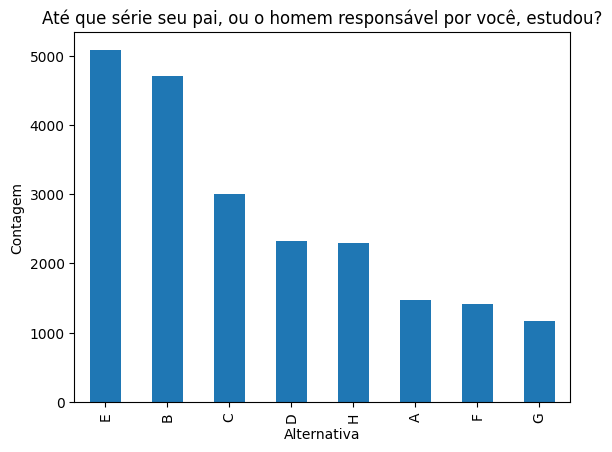

In [ ]:
print("\nContagem das repostas dos alunos")
print(enem["Q001"].value_counts())

# Visualização gráfica
plt.figure()
enem["Q001"].value_counts().plot(kind="bar")
plt.title("Até que série seu pai, ou o homem responsável por você, estudou?")
plt.xlabel("Alternativa")
plt.ylabel("Contagem")
plt.show()


- Completou o Ensino Médio, mas não completou a Faculdade (Opção E): Esta foi a opção mais selecionada, com 5084 respostas. Isso sugere que uma parcela significativa dos alunos tem um pai ou responsável que concluiu o Ensino Médio, mas não prosseguiu para o ensino superior.
- Não completou a 4ª série/5º ano do Ensino Fundamental (Opção B): Esta foi a segunda opção mais selecionada, com 4705 respostas. Isso indica que uma parte substancial dos alunos tem um pai ou responsável que não concluiu a educação básica.
- Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental (Opção C): Esta opção recebeu 3007 respostas, sugerindo que alguns alunos têm um pai ou responsável que completou parte da educação fundamental, mas não concluiu todo o ciclo.
- Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio (Opção D): Com 2325 respostas, esta opção indica que alguns alunos têm um pai ou responsável que concluiu a educação fundamental, mas não prosseguiu para o Ensino Médio.
- Não sei (Opção H): Com 2299 respostas, esta opção reflete a incerteza ou falta de conhecimento sobre o nível de escolaridade do pai ou do homem responsável.
- Nunca estudou (Opção A) com 1480 respostas, Completou a Faculdade mas não completou a Pós-graduação (Opção F) com 1411 e Completou a - Pós-graduação (Opção G) com 1172: Essas opções receberam menos respostas em comparação com as anteriores, indicando que uma parcela menor dos alunos tem um pai ou responsável nessas categorias educacionais.

#### Nível de escolaridade da mãe ou a mulher responsável

A questão sobre o nível de escolaridade da mãe oferece uma visão importante do ambiente educacional familiar dos alunos que participam do ENEM. As respostas abrangem uma variedade de níveis educacionais, refletindo a diversidade de experiências educacionais das mães dos alunos.


Contagem das respostas dos alunos
Q002
E    6442
B    3325
C    2990
D    2842
G    2090
F    2067
H     941
A     786
Name: count, dtype: int64


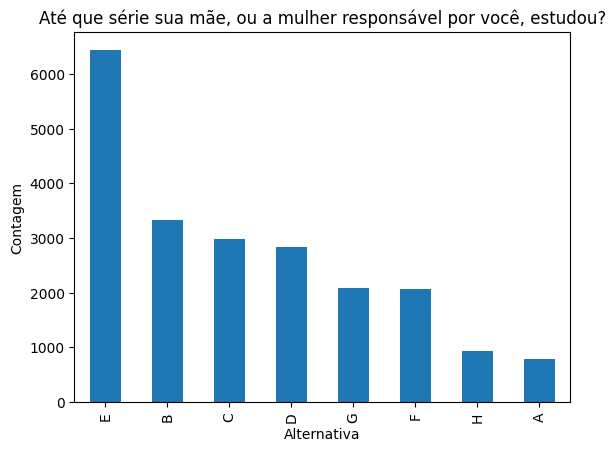

In [ ]:
print("\nContagem das respostas dos alunos")
print(enem["Q002"].value_counts())

# Visualização gráfica
plt.figure()
enem["Q002"].value_counts().plot(kind="bar")
plt.title("Até que série sua mãe, ou a mulher responsável por você, estudou?")
plt.xlabel("Alternativa")
plt.ylabel("Contagem")
plt.show()


- Completou o Ensino Médio, mas não completou a Faculdade (Opção E): Esta foi a opção mais selecionada, com 6442 respostas. Isso indica que uma parcela significativa dos alunos tem uma mãe que concluiu o Ensino Médio, mas não prosseguiu para o ensino superior.- Não completou a 4ª - série/5º ano do Ensino Fundamental (Opção B): Esta foi a segunda opção mais selecionada, com 3325 respostas. Isso sugere que uma parte substancial dos alunos tem uma mãe que não concluiu a educação básica.
- Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental (Opção C): Esta opção recebeu 2990 respostas, indicando que alguns alunos têm uma mãe que completou parte da educação fundamental, mas não todo o ciclo.
- Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio (Opção D): Com 2842 respostas, esta opção indica que alguns alunos têm uma mãe que concluiu a educação fundamental, mas não prosseguiu para o Ensino Médio.
- Completou a Pós-graduação (Opção G) e Completou a Faculdade mas não completou a Pós-graduação (Opção F): Estas opções foram selecionadas por 2090 e 2067 alunos, respectivamente. Isso sugere que uma parcela significativa dos alunos tem uma mãe com ensino superior completo ou em andamento.
- Não sei (Opção H) e Nunca estudou (Opção A): Estas opções foram menos selecionadas em comparação com as anteriores, com 941 e 786 respostas, respectivamente.


#### Ocupação do pai ou homem responsável

A pergunta sobre a ocupação do pai ou do homem responsável oferece insights sobre o contexto profissional dos alunos participantes do ENEM. As opções de resposta abrangem uma variedade de ocupações, classificadas em grupos ordenados de acordo com a natureza do trabalho e o nível de qualificação profissional.


Contagem das respostas dos alunos
Q003
A    6555
B    4118
C    3695
D    3503
F    2420
E    1192
Name: count, dtype: int64


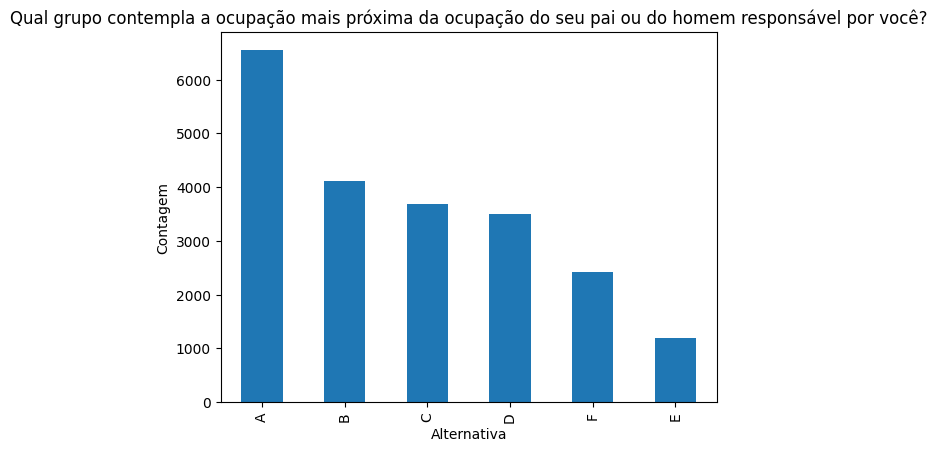

In [ ]:
print("\nContagem das respostas dos alunos")
print(enem["Q003"].value_counts())

# Visualização gráfica
plt.figure()
enem["Q003"].value_counts().plot(kind="bar")
plt.title("Qual grupo contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você?")
plt.xlabel("Alternativa")
plt.ylabel("Contagem")
plt.show()


- Grupo 1: Lavrador, agricultor, pescador, entre outros (Opção A): Esta foi a opção mais selecionada, com 6555 respostas. Isso sugere que uma parcela significativa dos alunos tem um pai ou responsável que trabalha em atividades agrícolas ou de subsistência.
- Grupo 2: Diarista, empregado doméstico, vendedor, entre outros (Opção B): Esta opção recebeu 4118 respostas, indicando que alguns alunos têm um pai ou responsável que trabalha em ocupações de serviços domésticos, vendas ou atendimento ao cliente.
- Grupo 3: Padeiro, pedreiro, eletricista, entre outros (Opção C): Com 3695 respostas, esta opção sugere que alguns alunos têm um pai ou responsável empregado em ocupações industriais, de construção civil ou de serviços técnicos.
- Grupo 4: Professor, técnico, policial, entre outros (Opção D): Esta opção recebeu 3503 respostas, indicando que alguns alunos têm um pai ou responsável empregado em ocupações educacionais, técnicas, de segurança pública ou administrativas.
- Grupo 5: Médico, engenheiro, advogado, entre outros (Opção E)Com 1192 respostas, esta opção sugere que uma parcela menor dos alunos tem um pai ou responsável empregado em ocupações altamente qualificadas, como medicina, engenharia ou advocacia.
- Não sei (Opção F): Com 2420 respostas, esta opção reflete a incerteza ou falta de conhecimento sobre a ocupação do pai ou do homem responsável.

#### Ocupação da mãe ou mulher resposável

A questão sobre a ocupação da mãe fornece informações cruciais sobre o contexto profissional das mães dos alunos participantes do ENEM. As opções de resposta abrangem uma variedade de ocupações, agrupadas de acordo com a natureza do trabalho e o nível de qualificação profissional.


Contagem das respostas dos alunos
Q004
B    7074
A    6244
D    4297
F    2031
E     955
C     882
Name: count, dtype: int64


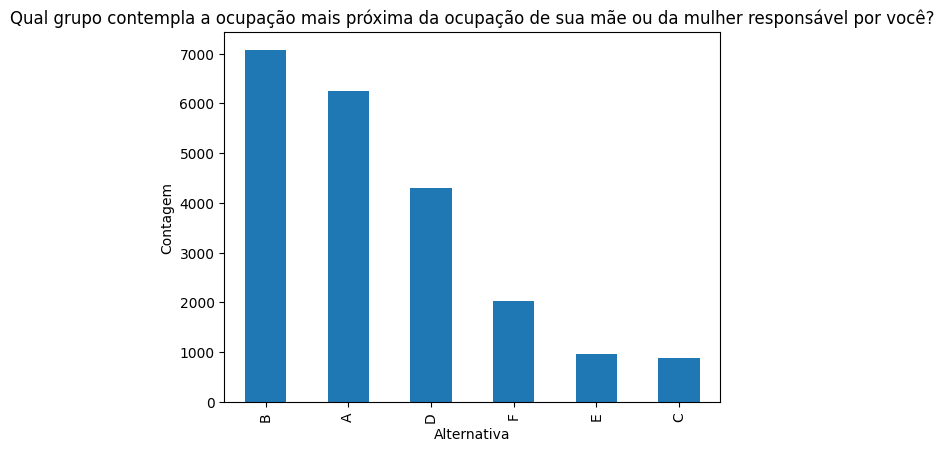

In [ ]:
print("\nContagem das respostas dos alunos")
print(enem["Q004"].value_counts())

# Visualização gráfica
plt.figure()
enem["Q004"].value_counts().plot(kind="bar")
plt.title("Qual grupo contempla a ocupação mais próxima da ocupação de sua mãe ou da mulher responsável por você?")
plt.xlabel("Alternativa")
plt.ylabel("Contagem")
plt.show()


- Grupo 2: Diarista, empregada doméstica, vendedora, entre outros (Opção B): Esta foi a opção mais selecionada, com 7074 respostas. Isso sugere que uma parcela significativa dos alunos tem uma mãe que trabalha em ocupações relacionadas a serviços domésticos ou vendas.
- Grupo 1: Lavradora, agricultora, pescadora, entre outros (Opção A): Com 6244 respostas, esta opção indica que uma parte substancial dos alunos tem uma mãe que trabalha em atividades agrícolas ou de subsistência.
- Grupo 4: Professora, técnica, policial, entre outros (Opção D): Com 4297 respostas, esta opção sugere que alguns alunos têm uma mãe empregada em ocupações educacionais, técnicas, de segurança pública ou administrativas.
- Grupo 6: Não sei (Opção F): Esta opção foi selecionada por 2031 alunos, refletindo a incerteza ou falta de conhecimento sobre a ocupação da mãe.
- Grupo 5: Médica, engenheira, advogada, entre outros (Opção E): Com 955 respostas, esta opção indica que uma parcela menor dos alunos tem uma mãe empregada em ocupações altamente qualificadas, como medicina, engenharia ou advocacia.
- Grupo 3: Padeira, costureira, eletricista, entre outros (Opção C): Com 882 respostas, esta opção sugere que alguns alunos têm uma mãe empregada em ocupações relacionadas a artesanato, construção civil ou serviços técnicos.

#### Número de pessoas que moram na residência do aluno incluindo ele.


Este histograma fornece uma visão clara da distribuição do número de pessoas que vivem na casa do aluno, ajudando a compreender a estrutura familiar dos alunos participantes do ENEM no estado da Paraíba.

##### Visualização da Distribuição


Contagem do número de moradores na residência
Q005
4    7974
3    5453
5    3835
2    2007
6    1303
7     439
Name: count, dtype: int64


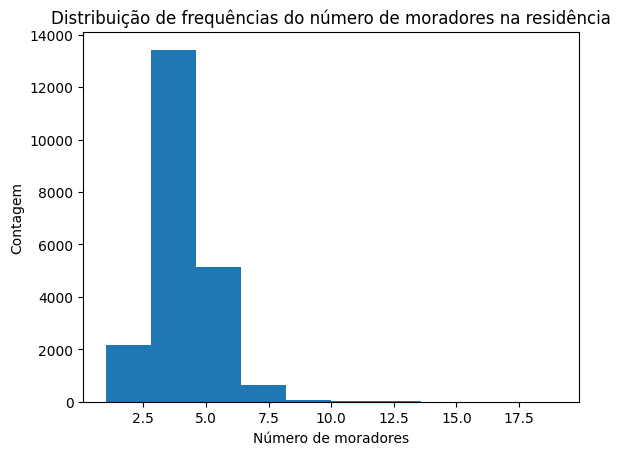

In [ ]:
print("\nContagem do número de moradores na residência")
print(enem["Q005"].value_counts().head(6))

# Visualização gráfica
plt.figure()
enem["Q005"].plot(kind="hist")
plt.title("Distribuição de frequências do número de moradores na residência")
plt.xlabel("Número de moradores")
plt.ylabel("Contagem")
plt.show()


 O histograma mostra a distribuição de frequências do número de moradores na residência dos alunos do estado da Paraíba que participaram do ENEM.

A maioria dos alunos vive em residências com 3 a 6 moradores, com um pico em torno de 4 moradores.

Um número significativo de alunos vive em residências com 7 ou mais moradores, enquanto um número menor de alunos vive em residências com 1 ou 2 moradores.


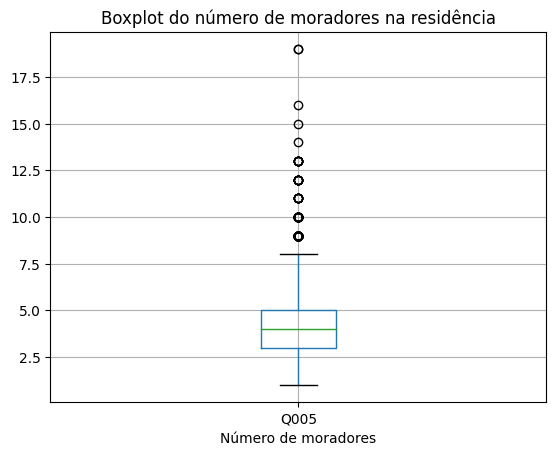

In [ ]:
plt.figure()
enem.boxplot(column="Q005", vert=True)
plt.title("Boxplot do número de moradores na residência")
plt.xlabel("Número de moradores")
plt.show()

- A mediana do número de moradores na residência é de 4 pessoas.

- A maioria dos alunos vive em residências com 3 a 6 moradores.

- Um número significativo de alunos vive em residências com 7 ou mais moradores, enquanto um número menor de alunos vive em residências com 1 ou 2 moradores.

- Há alguns outliers, que são alunos que vivem em residências com um número muito alto de moradores.

##### Medidas de Centralidade do número de moradores na residência dos alunos

In [ ]:
# Medidas descritivas
print("\nMedidas descritivas do número de moradores na residência dos alunos:")
print("Número Máximo: ", enem["Q005"].max())
print("Número Mínimo: ", enem["Q005"].min())
print("Mediana: ",enem["Q005"].median())
print("Média: ",enem["Q005"].mean())


Medidas descritivas do número de moradores na residência dos alunos:
Número Máximo:  19
Número Mínimo:  1
Mediana:  4.0
Média:  3.974305264627845


- Número Máximo (19): Este valor indica que o maior número de moradores em uma única residência é de 19 pessoas, incluindo o aluno.
- Número Mínimo (1): Isso significa que a menor quantidade de moradores em uma residência é de apenas uma pessoa, ou seja, o aluno mora sozinho.
- Mediana (4.0): A mediana é o valor que separa a metade superior da metade inferior de uma distribuição de dados. Neste caso, a mediana é 4, o que significa que metade das residências têm 4 ou menos moradores, e a outra metade tem 4 ou mais moradores.
- Média (3.97): A média é a soma de todos os valores dividida pelo número total de valores. Neste caso, a média é aproximadamente 3.97, indicando que, em média, as residências têm quase 4 moradores.

##### Medidas de Dispersão do número de moradores na residência dos alunos

In [ ]:
variancia = enem['Q005'].var()
desvio_padrao = enem['Q005'].std()

media = enem['Q005'].mean()
coeficiente_variacao = desvio_padrao / media

q1 = enem['Q005'].quantile(0.25)
q3 = enem['Q005'].quantile(0.75)
iqr = q3 - q1

print("Variância: ", variancia)
print("Desvio Padrão: ", desvio_padrao)
print("Coeficiente de variação: ", coeficiente_variacao)
print("IQR: ", iqr)

Variância:  1.6850300952459998
Desvio Padrão:  1.2980870907785809
Coeficiente de variação:  0.32661987551178556
IQR:  2.0


- Variância (1.685): A variância é uma medida da dispersão dos valores em torno da média. Neste caso, uma variância de aproximadamente 1.685 indica uma dispersão moderada dos dados em relação à média.
- Desvio Padrão (1.298): O desvio padrão é a raiz quadrada da variância e fornece uma medida mais interpretável da dispersão dos dados. Um desvio padrão de cerca de 1.298 indica que, em média, os valores estão a cerca de 1.298 unidades longe da média.
- Coeficiente de Variação (0.327): O coeficiente de variação é uma medida da variabilidade relativa dos dados em relação à média, expressa como uma porcentagem. Neste caso, um coeficiente de variação de aproximadamente 32.7% indica uma variabilidade moderada em relação à média.
- IQR (2.0): O intervalo interquartil (IQR) é uma medida da dispersão dos dados que desconsidera os valores extremos. Neste caso, um IQR de 2.0 indica que a diferença entre o primeiro quartil (25º percentil) e o terceiro quartil (75º percentil) dos dados é de 2.0 unidades.

#### Possui tem TV por assinatura na residencia do aluno.





Este histograma fornece uma visão clara da distribuição de pessoas que possuem TV por assinatura sem sua residencia, ajudando a compreender o contetudo que é consumido nas residencias dos alunos que pode contribuir com seu aprendizado participantes do ENEM no estado da Paraíba.

##### Visualização da Distribuição


Contagem do número de alunos com TV por assinatura
Q021
A    18455
B     3028
Name: count, dtype: int64


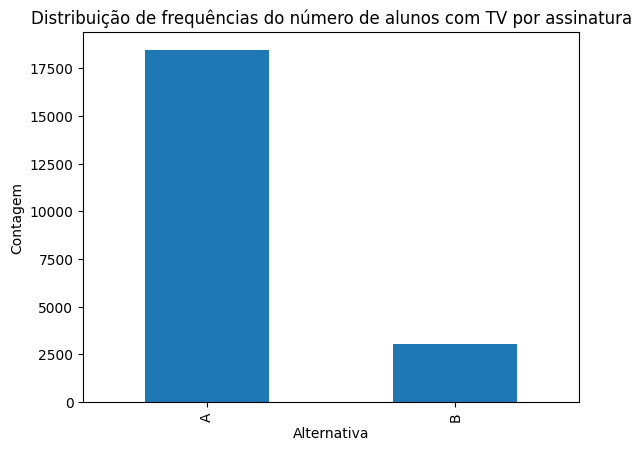

In [ ]:
print("\nContagem do número de alunos com TV por assinatura")
print(enem["Q021"].value_counts())

# Visualização gráfica
plt.figure()
enem["Q021"].value_counts().plot(kind="bar")
plt.title("Distribuição de frequências do número de alunos com TV por assinatura")
plt.xlabel("Alternativa")
plt.ylabel("Contagem")
plt.show()

A maioria dos alunos não possui TV por assinatura (Opção A), com mais de 17 mil respostas.

Uma parcela significativa dos alunos possui TV por assinatura (Opção B), com cerca de 3 mil respostas.

#### Possui telefone celular na residência do aluno.

A questão sobre o telefone celular fornece insights valiosos sobre os recursos educacionais dos alunos participantes do ENEM possuem. Observe o gráfico abaixo:

##### Visualização da Distribuição


Contagem das repostas dos alunos
Q022
C    6218
D    5992
E    4500
B    4215
A     558
Name: count, dtype: int64


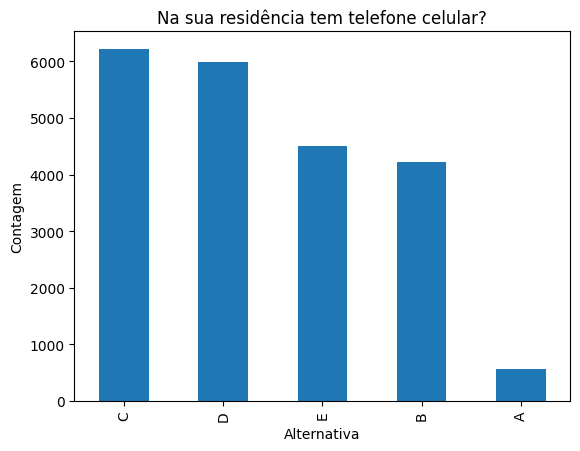

In [ ]:
print("\nContagem das repostas dos alunos")
print(enem["Q022"].value_counts())

# Visualização gráfica
plt.figure()
enem["Q022"].value_counts().plot(kind="bar")
plt.title("Na sua residência tem telefone celular?")
plt.xlabel("Alternativa")
plt.ylabel("Contagem")
plt.show()

- A maioria dos alunos possui 1 ou mais telefone celular (Opção B, C, D, E). Cerca de 20.925 alunos possuem  o mesmo. Isso sugere que a maioria dos alunos tem acesso a um telefone celular em suas residências.
- Uma parcela significativa dos alunos não possui telefone celular (Opção A), com cerca de 558 respostas. Isso indica que alguns alunos não têm acesso a um telefone celular em suas residências.


#### Possui computador na residência do aluno.

A questão sobre o computador nas residencias dos alunos fornece insights valiosos sobre os recursos educacionais dos alunos participantes do ENEM possuem. Observe o gráfico abaixo:

##### Visualização da Distribuição


Contagem das repostas dos alunos
Q024
A    13411
B     5837
C     1372
D      586
E      277
Name: count, dtype: int64


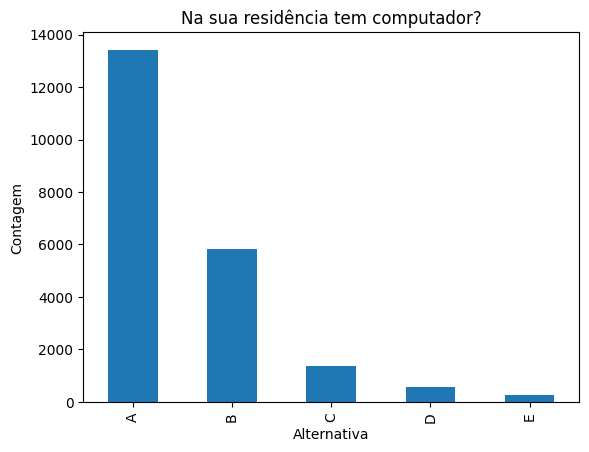

In [ ]:
print("\nContagem das repostas dos alunos")
print(enem["Q024"].value_counts())

# Visualização gráfica
plt.figure()
enem["Q024"].value_counts().plot(kind="bar")
plt.title("Na sua residência tem computador?")
plt.xlabel("Alternativa")
plt.ylabel("Contagem")
plt.show()



O gráfico mostra que a maioria dos alunos (cerca de 13.000) não possui computador em casa. No entanto, uma parcela significativa (cerca de 5 mil alunos) possui um computador em casa. Uma pequena parcela (cerca de 2 mil alunos) possui dois ou mais computadores em casa.

#### Possui acesso a internet na residência do aluno.


A questão sobre a internet nas residencias dos alunos fornece insights valiosos sobre os recursos educacionais dos alunos participantes do ENEM possuem. Observe o gráfico abaixo:

##### Visualização da Distribuição


Contagem das repostas dos alunos
Q025
B    19308
A     2175
Name: count, dtype: int64


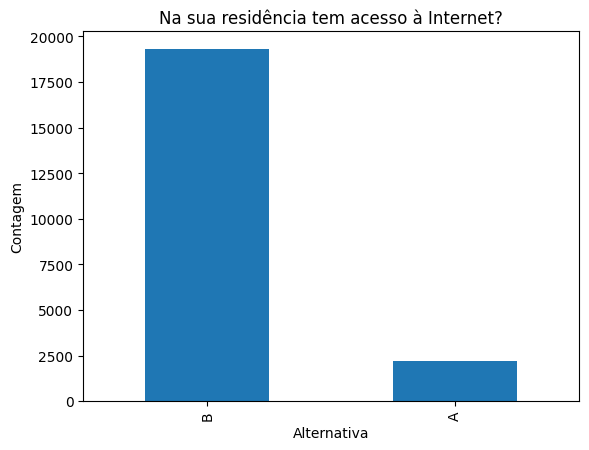

In [ ]:
print("\nContagem das repostas dos alunos")
print(enem["Q025"].value_counts())

# Visualização gráfica
plt.figure()
enem["Q025"].value_counts().plot(kind="bar")
plt.title("Na sua residência tem acesso à Internet?")
plt.xlabel("Alternativa")
plt.ylabel("Contagem")
plt.show()


O gráfico mostra que a maioria dos alunos (cerca de 19 mil) possui acesso à internet em casa. No entanto, uma parcela significativa (cerca de 2 mil alunos)
não possui acesso à internet em casa.


# Relação entre Variaveis


Para analisar as correlações entre as variáveis em nosso estudo, empregamos duas estratégias distintas: a correlação de Pearson e a análise de variância (ANOVA).



#### Correlação de Pearson:




A correlação de Pearson é uma medida estatística que avalia a relação linear entre duas variáveis contínuas. Seu coeficiente, representado por "r", varia de -1 a 1, onde -1 indica uma relação negativa perfeita, 0 indica ausência de correlação e 1 indica uma relação positiva perfeita. Para interpretar o valor de "r", adotamos a seguinte classificação:

- muito forte: r>0,8 ou r<-0,8
- forte: 0,6>r≥0,8 ou -0,8≥r>-0,6
- moderada: 0,4>r≥0,6 ou -0,6≥r>-0,4
- fraco: 0,2>r≥0,4 ou -0,4≥r>-0,2
- muito fraco: 0>r≥0,2 ou -0,2≥r>-0
- sem relação: r=0

Essa abordagem nos permite avaliar a força e a direção da relação entre as variáveis contínuas, fornecendo insights valiosos para nossa análise.

#### Correlação ANOVA:



A análise de variância (ANOVA) é uma técnica estatística utilizada para comparar as médias de três ou mais grupos. Ela nos permite determinar se há diferenças significativas entre as médias das variáveis contínuas em relação às variáveis categóricas. A interpretação dos resultados da ANOVA é baseada principalmente no valor de "p". Um valor p baixo (tipicamente abaixo de 0,05) indica que há diferenças estatisticamente significativas entre os grupos, enquanto um valor p alto sugere que não há evidências suficientes para rejeitar a hipótese nula de que não há diferenças entre os grupos.

**Hipóteses:**

*Hipótese nula (H0):* Não há diferenças significativas entre os grupos.

*Hipótese alternativa (H1):* Há diferenças significativas entre os grupos.

*Valor F:* O valor F é calculado comparando a variabilidade da média entre os grupos com a variabilidade da média dentro dos grupos. Se a variabilidade da média entre os grupos for significativamente maior do que a variabilidade dentro dos grupos, o valor F será alto. Isso sugere que existem diferenças reais entre os grupos em termos das médias das variáveis contínuas.

*Valor p:* O valor p é a probabilidade de observar os resultados da ANOVA, ou resultados mais extremos, se a hipótese nula for verdadeira.

**Para melhor entedimento segue o exemplo abaixo:**

Suponhamos que desejamos investigar se o tipo de escola frequentada pelos alunos influencia em suas notas no ENEM. Os grupos seriam definidos como **escolas particulares**, **escolas públicas** e **alunos que não responderam**. A ANOVA nos permitirá determinar se há diferenças significativas nas médias das notas entre esses grupos.

- Variabilidade entre os grupos: Avalia se a média das notas varia entre os três grupos definidos. Por exemplo, verifica se a média das notas dos alunos que frequentam escolas particulares é significativamente diferente da média dos -alunos de escolas públicas.
- Variabilidade dentro dos grupos: Verifica se há variação nas notas dentro de cada grupo. Por exemplo, verifica se a média das notas dos alunos em uma mesma escola pública varia significativamente.

Se a variabilidade entre os grupos for consideravelmente maior do que a variabilidade dentro dos grupos, o valor F será alto, sugerindo que há diferenças reais entre os grupos. Se o valor p associado for inferior a 0.05, teremos evidências significativas para rejeitar a hipótese nula e concluir que o tipo de escola tem impacto nas notas dos alunos. Caso contrário, não podemos afirmar com confiança que existem diferenças entre os grupos.

## Correlação do Sexo do aluno com a Nota Geral

In [ ]:
notas_mulheres = enem['MEDIA_GERAL'][enem['TP_SEXO'] == 'F']
notas_homens = enem['MEDIA_GERAL'][enem['TP_SEXO'] == 'M']

# Realize a ANOVA
anova_result = f_oneway(notas_mulheres, notas_homens)

# Exiba os resultados
print("Resultados da ANOVA:")
print("Valor F:", anova_result.statistic)
print("Valor p:", anova_result.pvalue)

Resultados da ANOVA:
Valor F: 0.19043335060834016
Valor p: 0.6625605738787748


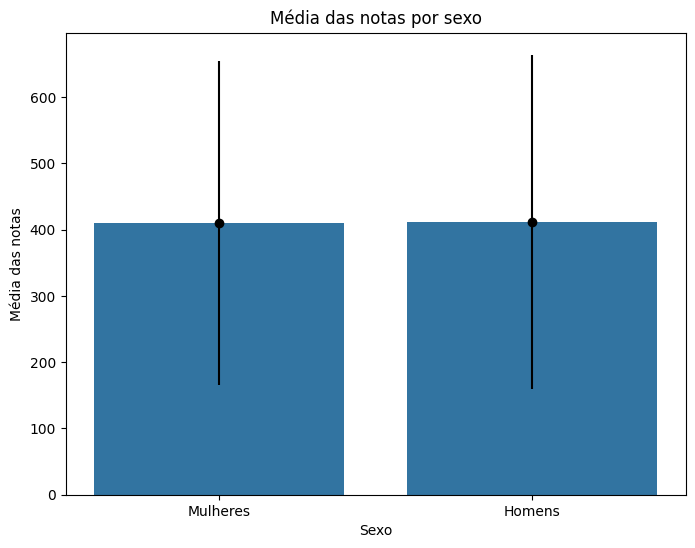

In [ ]:
# Calcular médias e desvios padrão
media_mulheres = notas_mulheres.mean()
std_mulheres = notas_mulheres.std()

media_homens = notas_homens.mean()
std_homens = notas_homens.std()

# Plotar gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=['Mulheres', 'Homens'], y=[media_mulheres, media_homens], errorbar='sd')
plt.errorbar(x=['Mulheres', 'Homens'], y=[media_mulheres, media_homens], yerr=[std_mulheres, std_homens], fmt='o', color='black')
plt.title('Média das notas por sexo')
plt.xlabel('Sexo')
plt.ylabel('Média das notas')
plt.show()


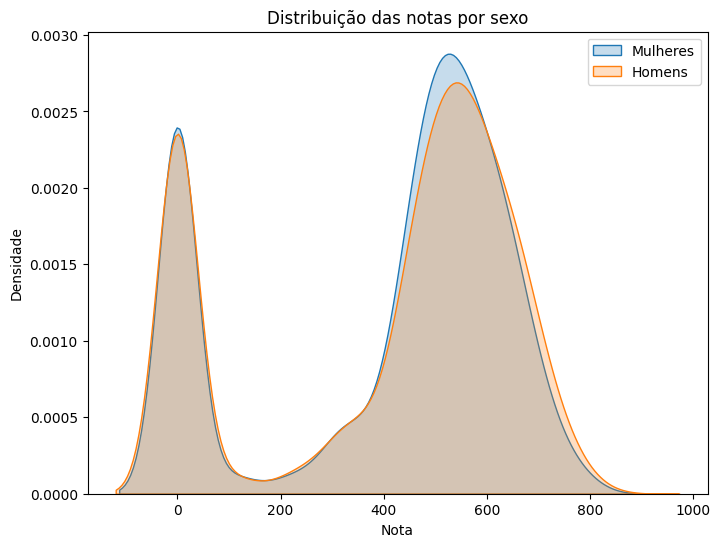

In [ ]:
# Plotar gráfico de densidade
plt.figure(figsize=(8, 6))
sns.kdeplot(notas_mulheres, label='Mulheres', fill=True)
sns.kdeplot(notas_homens, label='Homens', fill=True)
plt.title('Distribuição das notas por sexo')
plt.xlabel('Nota')
plt.ylabel('Densidade')
plt.legend()
plt.show()


O valor de F é 0.1904, o que indica que a variabilidade entre os grupos é menor do que a variabilidade dentro dos grupos.

O valor p é 0.6626, o que significa que a probabilidade de observar os resultados da ANOVA (ou resultados mais extremos) se não houver diferença real entre as médias dos grupos é de aproximadamente 66.26%.

Portanto, com um valor p tão alto, não há evidências suficientes para rejeitar a hipótese nula. Isso sugere que não há uma diferença estatisticamente significativa nas médias das notas entre os grupos de sexo. Em outras palavras, as médias das notas não diferem significativamente entre homens e mulheres, com base nos dados analisados.

## Correlação da Raça do aluno com a Nota Geral

In [ ]:
grupo_raca = []
for quantidade, grupo in enem.groupby('TP_COR_RACA')['MEDIA_GERAL']:
    grupo_raca.append(grupo)

# Realiza o teste ANOVA
anova_result = f_oneway(*grupo_raca)

# Realize a ANOVA

# Exiba os resultados
print("Resultados da ANOVA:")
print("Valor F:", anova_result.statistic)
print("Valor p:", anova_result.pvalue)

Resultados da ANOVA:
Valor F: 153.6491926323101
Valor p: 6.665462646910958e-161


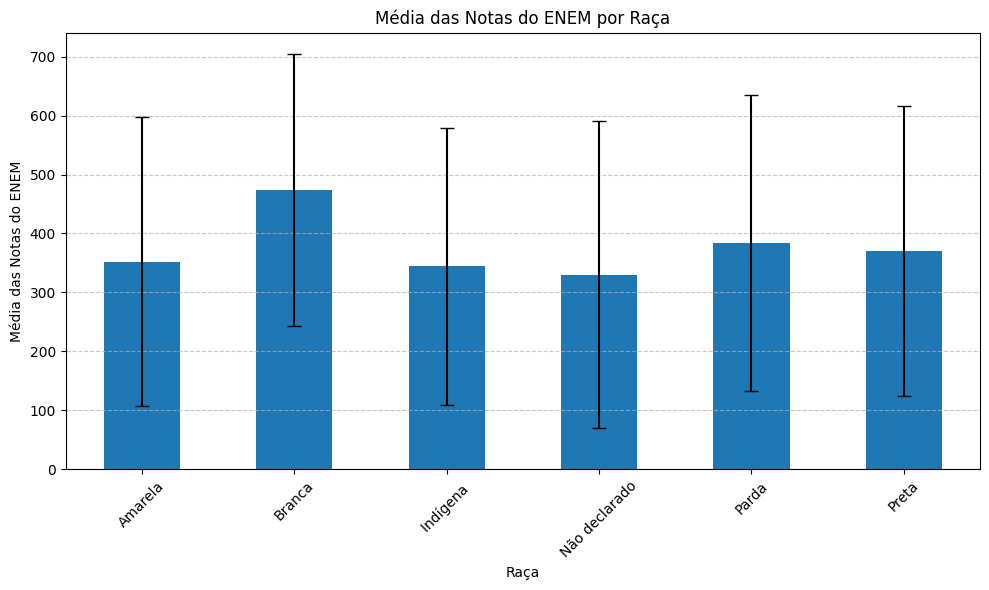

In [ ]:
# Calcula as médias e desvios padrão das notas do ENEM por faixa de renda
media_por_raca = enem.groupby('TP_COR_RACA')['MEDIA_GERAL'].mean()
desvio_padrao_por_raca = enem.groupby('TP_COR_RACA')['MEDIA_GERAL'].std()

# Gráfico de barras
plt.figure(figsize=(10, 6))
media_por_raca.plot(kind='bar', yerr=desvio_padrao_por_raca, capsize=5)
plt.title('Média das Notas do ENEM por Raça')
plt.xlabel('Raça')
plt.ylabel('Média das Notas do ENEM')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

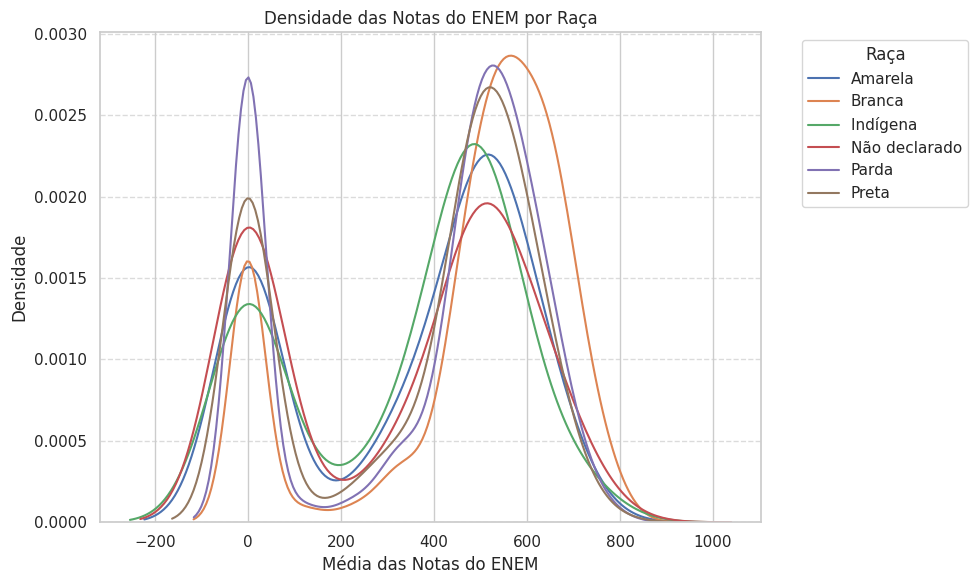

In [ ]:
sns.set(style="whitegrid")

# Gráfico de densidade
plt.figure(figsize=(10, 6))
for faixa, grupo in enem.groupby('TP_COR_RACA')['MEDIA_GERAL']:
    sns.kdeplot(grupo, label=f'{faixa}')
plt.title('Densidade das Notas do ENEM por Raça')
plt.xlabel('Média das Notas do ENEM')
plt.ylabel('Densidade')
plt.legend(title='Raça', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Valor F: 153.65 - Este valor F indica a relação entre a variabilidade das médias das notas entre os grupos (definidos pela raça) e a variabilidade das médias dentro dos próprios grupos. Um valor alto do teste F sugere que a variação entre os grupos é maior do que a variação dentro dos grupos.
- Valor p: 6.665e-161 - Este valor p é extremamente baixo, indicando que há uma forte evidência contra a hipótese nula (que não há diferença real entre os grupos), e, portanto, podemos rejeitá-la. Isso significa que há diferenças significativas nas notas gerais entre os grupos definidos pela raça.
- Portanto, os resultados sugerem que a raça está associada a diferenças significativas nas notas gerais dos alunos no ENEM.

## Correlação da Renda Familiar do aluno com a Nota Geral



In [ ]:
# Agrupa as médias das notas do ENEM por faixa de renda
grupo_renda = []
for faixa, grupo in enem.groupby('Q006')['MEDIA_GERAL']:
    grupo_renda.append(grupo)

# Realiza o teste ANOVA
anova_resultado = f_oneway(*grupo_renda)

print("Estatística F:", anova_resultado.statistic)
print("Valor p:", anova_resultado.pvalue)

Estatística F: 259.61528507193833
Valor p: 0.0


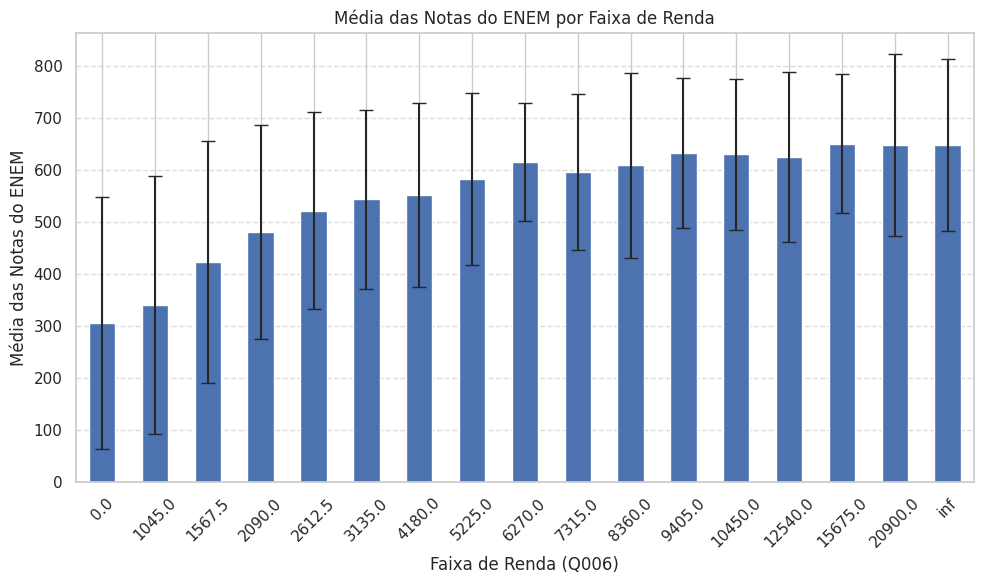

In [ ]:
# Calcula as médias e desvios padrão das notas do ENEM por faixa de renda
media_por_renda = enem.groupby('Q006')['MEDIA_GERAL'].mean()
desvio_padrao_por_renda = enem.groupby('Q006')['MEDIA_GERAL'].std()

# Gráfico de barras
plt.figure(figsize=(10, 6))
media_por_renda.plot(kind='bar', yerr=desvio_padrao_por_renda, capsize=5)
plt.title('Média das Notas do ENEM por Faixa de Renda')
plt.xlabel('Faixa de Renda (Q006)')
plt.ylabel('Média das Notas do ENEM')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


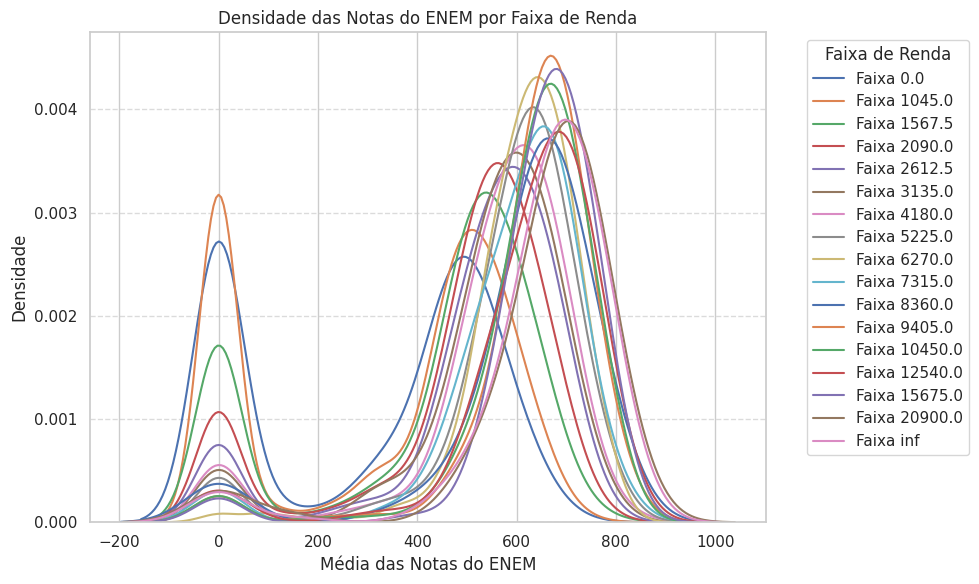

In [ ]:
sns.set(style="whitegrid")

# Gráfico de densidade
plt.figure(figsize=(10, 6))
for faixa, grupo in enem.groupby('Q006')['MEDIA_GERAL']:
    sns.kdeplot(grupo, label=f'Faixa {faixa}')
plt.title('Densidade das Notas do ENEM por Faixa de Renda')
plt.xlabel('Média das Notas do ENEM')
plt.ylabel('Densidade')
plt.legend(title='Faixa de Renda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


O valor de F é 259.6153, indicando que a variabilidade entre os grupos é significativamente maior do que a variabilidade dentro dos grupos.

O valor p é 0.0, o que significa que a probabilidade de observar os resultados da ANOVA (ou resultados mais extremos) se não houver diferença real entre as médias dos grupos é essencialmente zero.

Um valor de p igual a zero é uma indicação de que a probabilidade de observar uma estatística F tão extrema quanto a observada, sob a hipótese nula de que não há diferença entre as médias das notas do ENEM entre os grupos de renda familiar, é essencialmente zero. Isso significa que há uma diferença estatisticamente significativa entre as médias das notas do ENEM entre os grupos de renda familiar.

Quando o valor de p é extremamente baixo (praticamente zero), a conclusão é que há evidências estatísticas muito fortes contra a hipótese nula. Nesse caso, a hipótese nula é que não há diferença entre as médias das notas do ENEM entre os grupos de renda familiar.

Portanto, com base nos resultados da ANOVA, podemos concluir que a renda familiar está significativamente associada às notas gerais dos alunos no ENEM.

In [ ]:
enem['Q006'] = enem['Q006'].replace([np.inf, np.nan], 20001)
enem['Q006'] = enem['Q006'].apply(lambda x: min(x, 20001))
correlacao = enem['Q006'].corr(enem['MEDIA_GERAL'])

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlacao)



Pearson correlation coefficient: 0.3143488854623212


O coeficiente de correlação de Pearson calculado entre a renda e a nota geral é aproximadamente 0.314. Isso indica uma correlação positiva moderada entre essas variáveis. Em outras palavras, à medida que a renda aumenta, a nota geral no ENEM também tende a aumentar, e vice-versa.

## Correlação da Quantidade de Carros na residência do aluno com a Nota Geral



In [ ]:
# Agrupa as médias das notas do ENEM por quantidade de carros na residência
grupo_carros = []
for quantidade, grupo in enem.groupby('Q010')['MEDIA_GERAL']:
    grupo_carros.append(grupo)

# Realiza o teste ANOVA
anova_resultado_carros = f_oneway(*grupo_carros)

print("Estatística F:", anova_resultado_carros.statistic)
print("Valor p:", anova_resultado_carros.pvalue)

Estatística F: 574.4675245528978
Valor p: 0.0


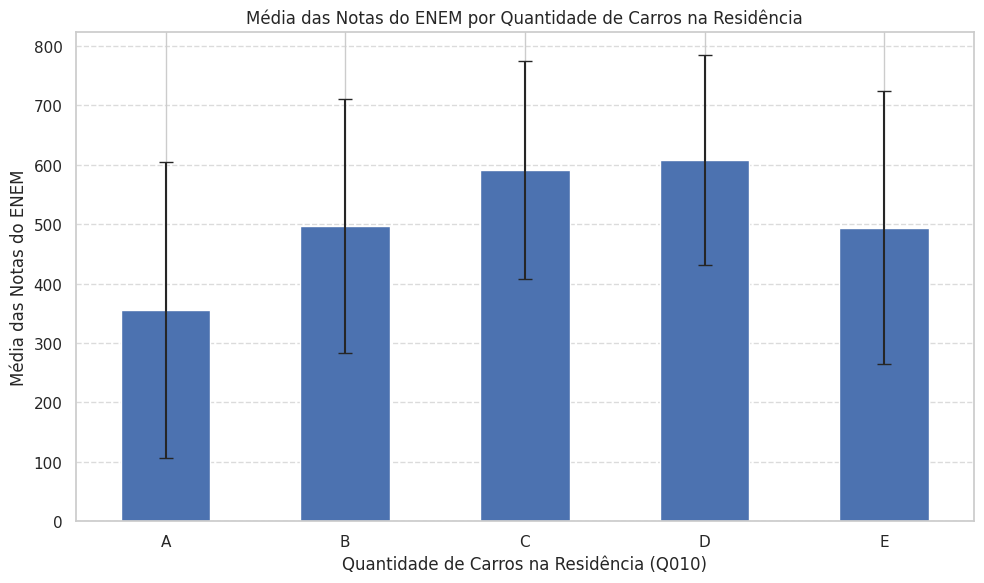

In [ ]:
# Calcula as médias e desvios padrão das notas do ENEM por quantidade de carros na residência
media_por_carros = enem.groupby('Q010')['MEDIA_GERAL'].mean()
desvio_padrao_por_carros = enem.groupby('Q010')['MEDIA_GERAL'].std()

# Plot do gráfico de barras
plt.figure(figsize=(10, 6))
media_por_carros.plot(kind='bar', yerr=desvio_padrao_por_carros, capsize=5)
plt.title('Média das Notas do ENEM por Quantidade de Carros na Residência')
plt.xlabel('Quantidade de Carros na Residência (Q010)')
plt.ylabel('Média das Notas do ENEM')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


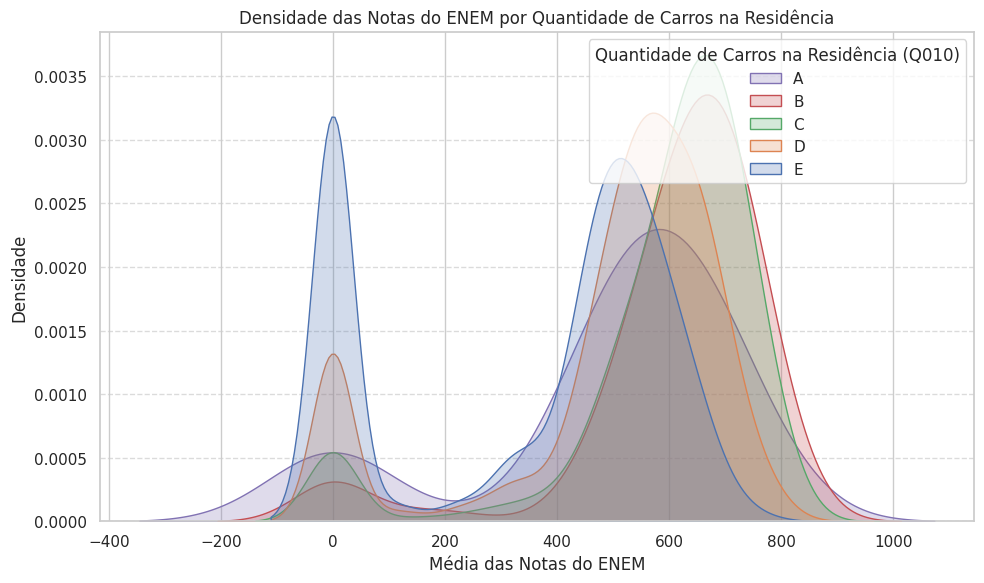

In [ ]:
# Gráfico de densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(data=enem, x='MEDIA_GERAL', hue='Q010', fill=True, common_norm=False)
num_carros = enem['Q010'].unique()
plt.legend(labels=num_carros, title='Quantidade de Carros na Residência (Q010)')
plt.title('Densidade das Notas do ENEM por Quantidade de Carros na Residência')
plt.xlabel('Média das Notas do ENEM')
plt.ylabel('Densidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Com base nos resultados da análise de variância (ANOVA) entre a quantidade de carros na residência do candidato e as notas do ENEM, observamos uma estatística F de 574.4675 e um valor p de 0.0.

O valor extremamente baixo do valor p indica que a probabilidade de observar os resultados da ANOVA (ou resultados mais extremos) se não houver diferença real entre as médias dos grupos é essencialmente zero. Isso sugere fortemente que há uma diferença estatisticamente significativa nas médias das notas do ENEM entre os grupos de quantidade de carros na residência dos candidatos.

Portanto, com um valor p tão baixo, rejeitamos a hipótese nula de que não há diferença entre as médias das notas do ENEM entre os grupos de quantidade de carros na residência. Em vez disso, concluímos que a quantidade de carros na residência do candidato tem um impacto significativo nas notas do ENEM, de acordo com os dados analisados.

## Correlação da Quantidade de Motocicletas na residência do aluno com a Nota Geral



In [ ]:
# Agrupa as médias das notas do ENEM por quantidade de motocicletas na residência
grupo_motocicletas = []
for quantidade, grupo in enem.groupby('Q011')['MEDIA_GERAL']:
    grupo_motocicletas.append(grupo)

# Realiza o teste ANOVA
anova_resultado_motocicletas = f_oneway(*grupo_motocicletas)

print("Estatística F:", anova_resultado_motocicletas.statistic)
print("Valor p:", anova_resultado_motocicletas.pvalue)

Estatística F: 1.310297750555811
Valor p: 0.26347049515767756


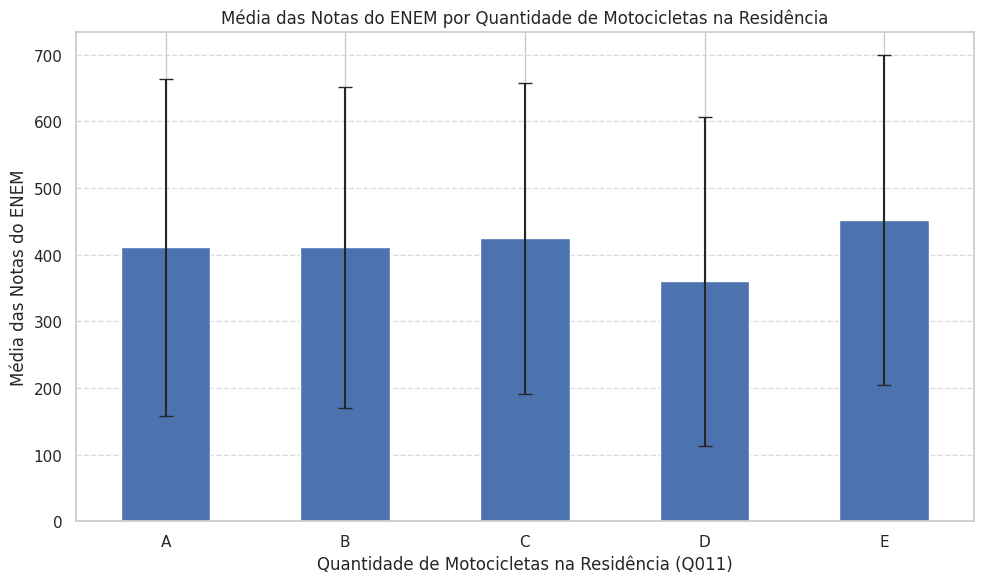

In [ ]:
# Calcula as médias e desvios padrão das notas do ENEM por quantidade de motocicletas na residência
media_por_motocicletas = enem.groupby('Q011')['MEDIA_GERAL'].mean()
desvio_padrao_por_motocicletas = enem.groupby('Q011')['MEDIA_GERAL'].std()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
media_por_motocicletas.plot(kind='bar', yerr=desvio_padrao_por_motocicletas, capsize=5)
plt.title('Média das Notas do ENEM por Quantidade de Motocicletas na Residência')
plt.xlabel('Quantidade de Motocicletas na Residência (Q011)')
plt.ylabel('Média das Notas do ENEM')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


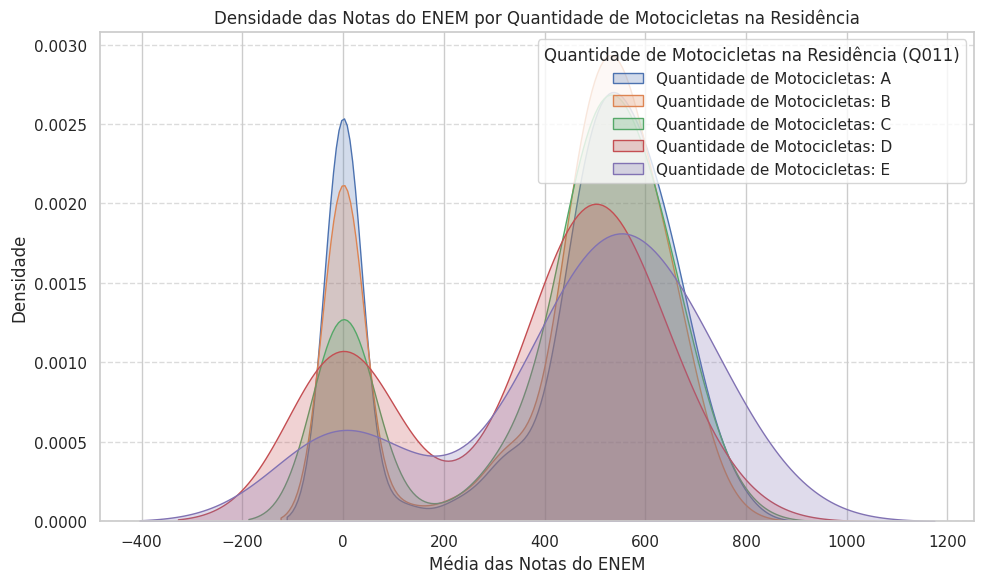

In [ ]:
# Gráfico de densidade
plt.figure(figsize=(10, 6))
for quantidade, grupo in enem.groupby('Q011')['MEDIA_GERAL']:
    sns.kdeplot(grupo, label=f'Quantidade de Motocicletas: {quantidade}', fill=True)

plt.title('Densidade das Notas do ENEM por Quantidade de Motocicletas na Residência')
plt.xlabel('Média das Notas do ENEM')
plt.ylabel('Densidade')
plt.legend(title='Quantidade de Motocicletas na Residência (Q011)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Com base nos resultados da análise de variância (ANOVA) entre a quantidade de motocicletas na residência do candidato e as notas do ENEM, observamos uma estatística F de 1.3103 e um valor p de 0.2635.

O valor p relativamente alto indica que a probabilidade de observar os resultados da ANOVA, ou resultados mais extremos, se não houver diferença real entre as médias dos grupos, é de aproximadamente 26.35%. Isso sugere que não há evidências suficientes para rejeitar a hipótese nula de que não há diferença significativa entre as médias das notas do ENEM entre os diferentes grupos de quantidade de motocicletas na residência do candidato.

Portanto, com um valor p tão alto, não podemos concluir que a quantidade de motocicletas na residência do candidato tem um impacto estatisticamente significativo nas notas do ENEM com base nos dados analisados.

## Correlação Entre ter internet com a Nota Geral

In [ ]:
tem_internet = enem['MEDIA_GERAL'][enem['Q025'] == 'B']
nao_tem = enem['MEDIA_GERAL'][enem['Q025'] == 'A']

# Realize a ANOVA
anova_result = f_oneway(tem_internet, nao_tem)

# Exiba os resultados
print("Resultados da ANOVA:")
print("Valor F:", anova_result.statistic)
print("Valor p:", anova_result.pvalue)

Resultados da ANOVA:
Valor F: 577.4410910611894
Valor p: 6.196936570346571e-126


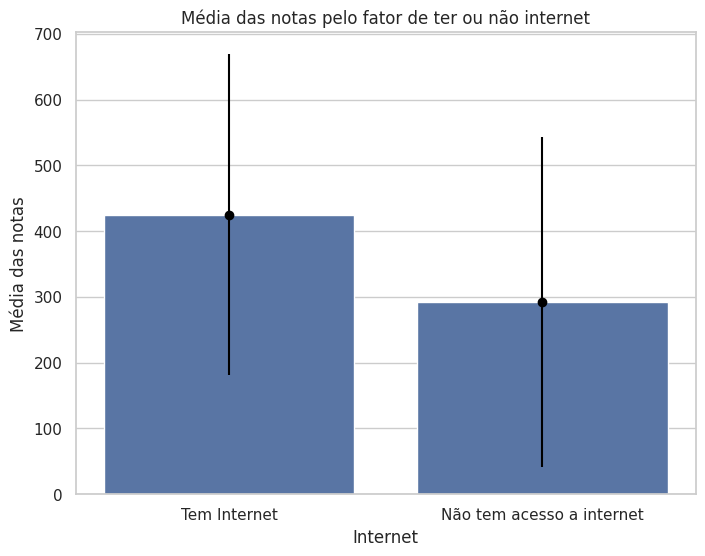

In [ ]:
media_tem_internet = tem_internet.mean()
std_tem_internet = tem_internet.std()

media_nao_tem = nao_tem.mean()
std_nao_tem = nao_tem.std()

# Plotar gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=['Tem Internet', 'Não tem acesso a internet'], y=[media_tem_internet, media_nao_tem], errorbar='sd')
plt.errorbar(x=['Tem Internet', 'Não tem acesso a internet'], y=[media_tem_internet, media_nao_tem], yerr=[std_tem_internet, std_nao_tem], fmt='o', color='black')
plt.title('Média das notas pelo fator de ter ou não internet')
plt.xlabel('Internet')
plt.ylabel('Média das notas')
plt.show()

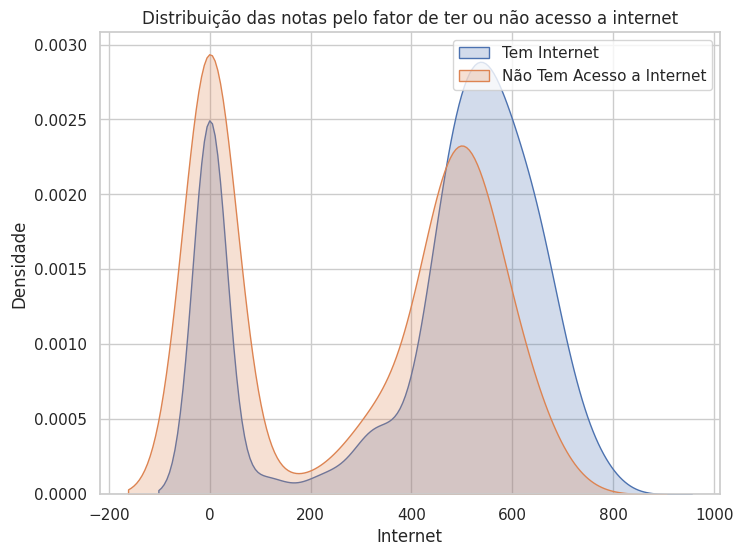

In [ ]:
# Plotar gráfico de densidade
plt.figure(figsize=(8, 6))
sns.kdeplot(tem_internet, label='Tem Internet', fill=True)
sns.kdeplot(nao_tem, label='Não Tem Acesso a Internet', fill=True)
plt.title('Distribuição das notas pelo fator de ter ou não acesso a internet')
plt.xlabel('Internet')
plt.ylabel('Densidade')
plt.legend()
plt.show()

- Valor F: 577.44 - Esse valor indica a relação entre a variabilidade das médias das notas entre os grupos (neste caso, grupos definidos pela disponibilidade de acesso à Internet) e a variabilidade das médias dentro dos próprios grupos. Um valor alto do teste F sugere que a variação entre os grupos é maior do que a variação dentro dos grupos.
- Valor p: 6.20e-126 - Este valor p é extremamente baixo, próximo de zero. Isso indica que há uma forte evidência contra a hipótese nula (que não há diferença real entre os grupos), e podemos rejeitá-la. Portanto, podemos concluir que há diferenças significativas nas notas gerais entre os grupos definidos pela disponibilidade de acesso à Internet.
- Em resumo, esses resultados sugerem que o acesso à Internet pode influenciar significativamente as notas gerais dos alunos no ENEM.

## Correlação entre ter um Computador com a Nota Geral

In [ ]:
a = enem['MEDIA_GERAL'][enem['Q024'] == 'A']
b = enem['MEDIA_GERAL'][enem['Q024'] == 'B']
c = enem['MEDIA_GERAL'][enem['Q024'] == 'C']
d = enem['MEDIA_GERAL'][enem['Q024'] == 'D']
e = enem['MEDIA_GERAL'][enem['Q024'] == 'E']
# Realize a ANOVA
anova_result = f_oneway(a, b, c, d, e)

# Exiba os resultados
print("Resultados da ANOVA:")
print("Valor F:", anova_result.statistic)
print("Valor p:", anova_result.pvalue)

Resultados da ANOVA:
Valor F: 953.9341578748558
Valor p: 0.0


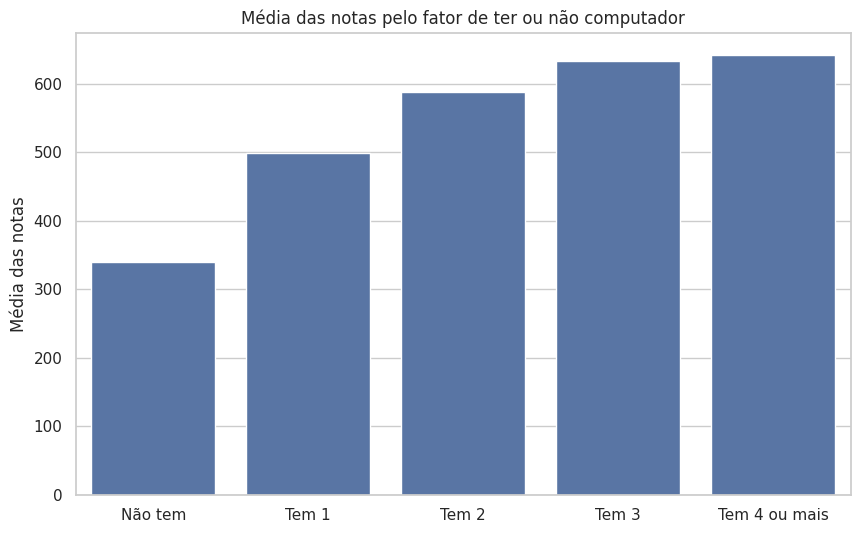

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Não tem', 'Tem 1', 'Tem 2', 'Tem 3', 'Tem 4 ou mais'], y=[a.mean(), b.mean(), c.mean(), d.mean(), e.mean()], errorbar='sd')
plt.title('Média das notas pelo fator de ter ou não computador')
plt.ylabel('Média das notas')
plt.show()


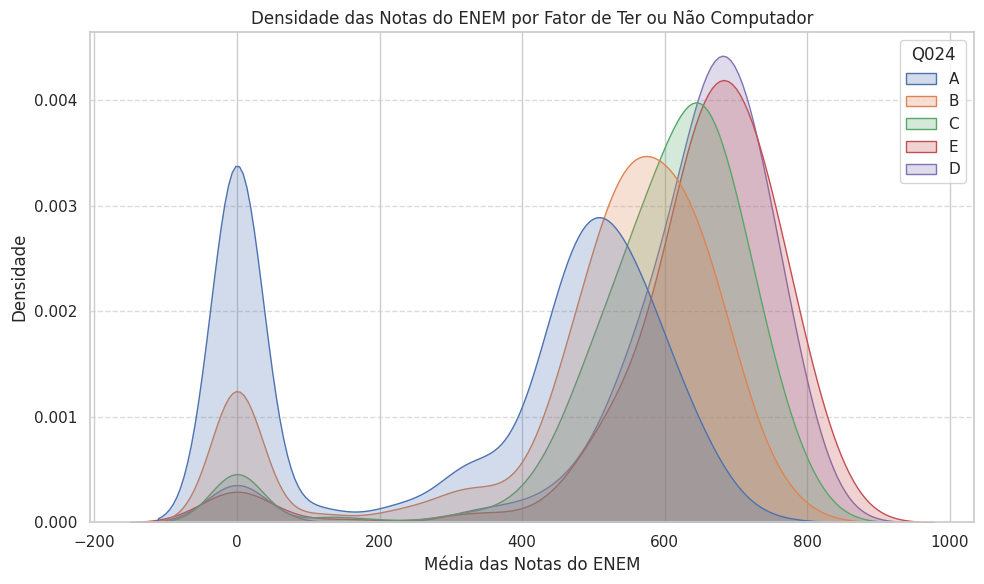

In [ ]:

plt.figure(figsize=(10, 6))

sns.kdeplot(data=enem, x='MEDIA_GERAL', hue='Q024', fill=True, common_norm=False)
plt.title('Densidade das Notas do ENEM por Fator de Ter ou Não Computador')
plt.xlabel('Média das Notas do ENEM')
plt.ylabel('Densidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Valor F: 953.93 - Este valor F indica a relação entre a variabilidade das médias das notas entre os grupos (definidos pela posse de um computador) e a variabilidade das médias dentro dos próprios grupos. Um valor alto do teste F sugere que a variação entre os grupos é maior do que a variação dentro dos grupos.
- Valor p: 0.0 - Este valor p é extremamente baixo, indicando que há uma forte evidência contra a hipótese nula (que não há diferença real entre os grupos), e, portanto, podemos rejeitá-la. Isso significa que há diferenças significativas nas notas gerais entre os grupos definidos pela posse de um computador.
- Portanto, os resultados sugerem que a posse de um computador está associada a diferenças significativas nas notas gerais dos alunos no ENEM.

## Correlação entre Tipo da Escola e Nota Geral

In [ ]:
a = enem['MEDIA_GERAL'][enem['TP_ESCOLA'] == 'Pública']
b = enem['MEDIA_GERAL'][enem['TP_ESCOLA'] == 'Privada']

# Realize a ANOVA
anova_result = f_oneway(a, b)

# Exiba os resultados
print("Resultados da ANOVA:")
print("Valor F:", anova_result.statistic)
print("Valor p:", anova_result.pvalue)

Resultados da ANOVA:
Valor F: 3717.4478485376667
Valor p: 0.0


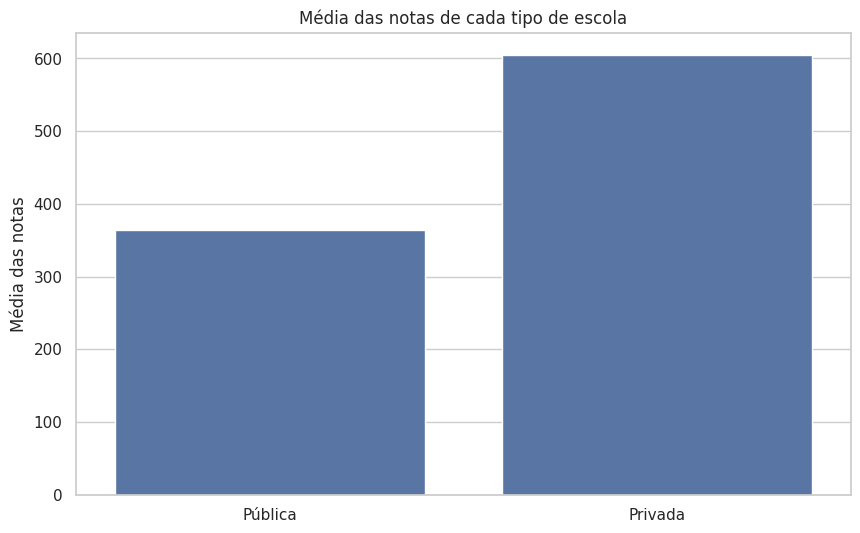

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['Pública', 'Privada', ], y=[a.mean(), b.mean()], errorbar='sd')
plt.title('Média das notas de cada tipo de escola')
plt.ylabel('Média das notas')
plt.show()

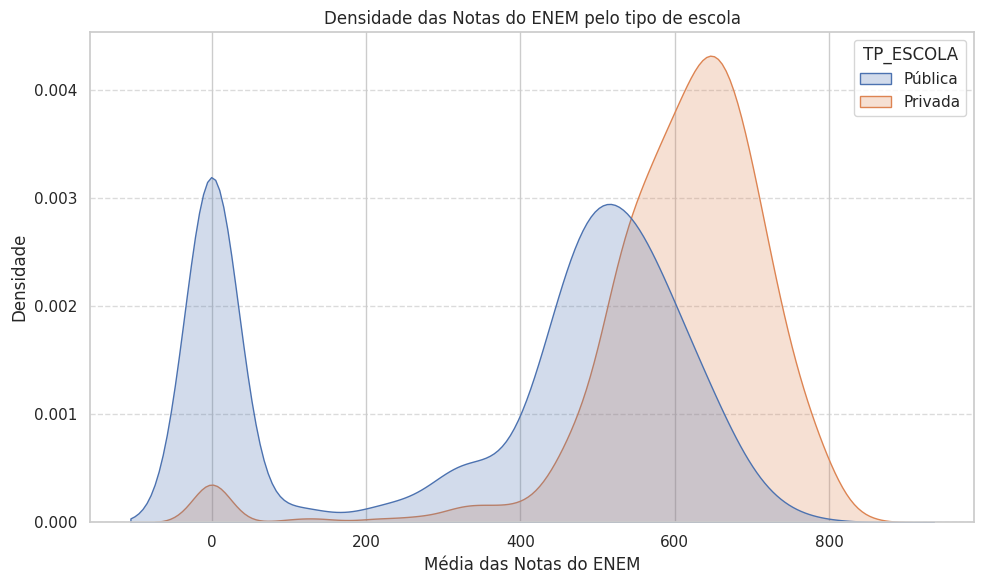

In [ ]:

plt.figure(figsize=(10, 6))

sns.kdeplot(data=enem, x='MEDIA_GERAL', hue='TP_ESCOLA', fill=True, common_norm=False)
plt.title('Densidade das Notas do ENEM pelo tipo de escola')
plt.xlabel('Média das Notas do ENEM')
plt.ylabel('Densidade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- O valor F é 3717.4478485376667. Neste caso, um valor alto sugere que há uma diferença significativa entre as notas médias dos alunos de escolas públicas e privadas.

- O valor p é 0.0. Com um valor p tão baixo, temos evidências significativas para rejeitar a hipótese nula, confirmando que há uma diferença significativa nas médias das notas gerais entre os grupos definidos pelo tipo de escola.

## Mapa de Calor da Correlação de algumas variáveis

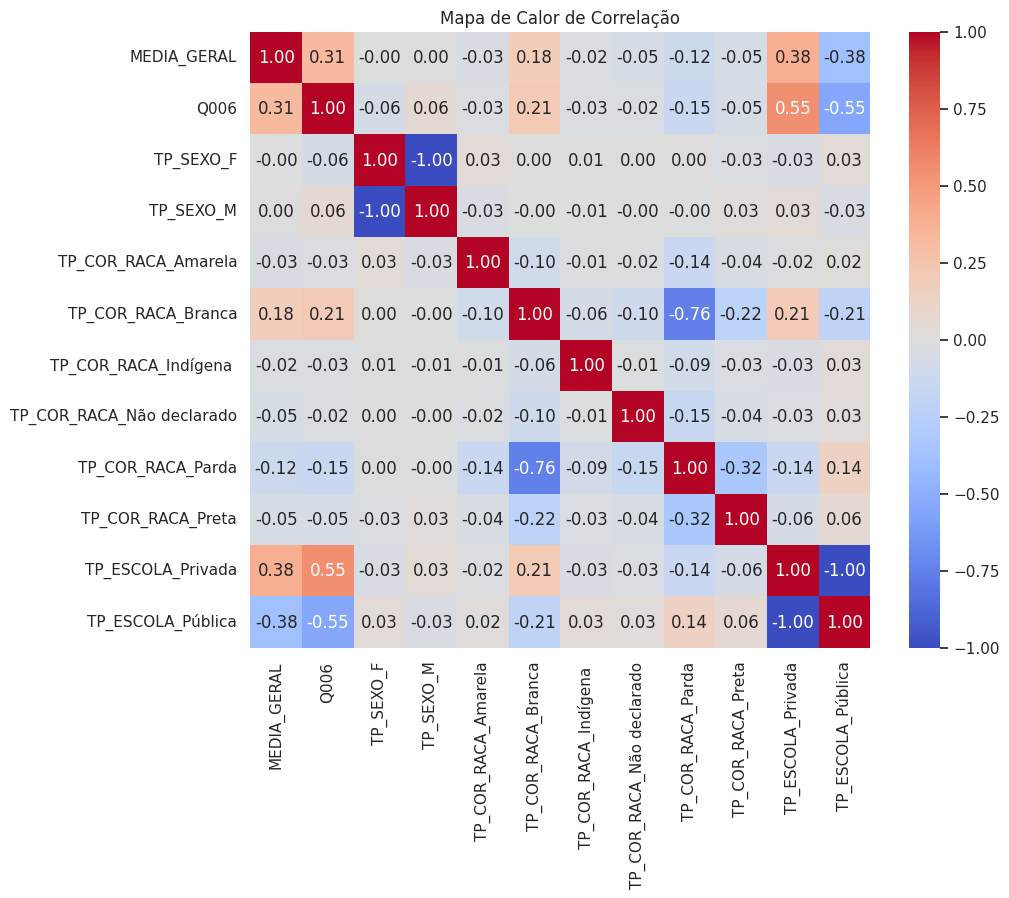

In [ ]:
x = enem[['TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'MEDIA_GERAL', 'Q006']]
x_dummy = pd.get_dummies(x)

correlation_matrix = x_dummy.corr()

# Crie um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação')
plt.show()

# Modelos de Regressão


### Criando os dummys

Dummy variables, ou variáveis fictícias, são variáveis binárias (0 ou 1) que representam diferentes categorias ou grupos em uma variável categórica. Elas são usadas em modelos estatísticos para representar variáveis categóricas como parte de uma análise de regressão ou outra modelagem estatística.

As dummy variables são necessárias porque muitos algoritmos de modelagem estatística não podem lidar diretamente com variáveis categóricas. Ao converter variáveis categóricas em dummy variables, cada categoria se torna uma variável binária separada, permitindo que modelos estatísticos incluam a influência dessas categorias em suas análises.

In [ ]:
enem_dummy = pd.get_dummies(enem, columns=['TP_SEXO', 'TP_COR_RACA', 'TP_ESTADO_CIVIL', 'TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',  'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q010', 'Q011', 'Q021', 'Q022', 'Q024', 'Q025'])


In [ ]:
print(enem_dummy.columns.tolist())


['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q023', 'MEDIA_GERAL', 'boa_nota', 'TP_SEXO_F', 'TP_SEXO_M', 'TP_COR_RACA_Amarela', 'TP_COR_RACA_Branca', 'TP_COR_RACA_Indígena ', 'TP_COR_RACA

## Regressão Linear Simples


### Modelo de Regressão Linear Simples da Renda Familiar com  a Media Geral

In [ ]:
enem['Q006'] = enem['Q006'].replace([np.inf], 20001)
enem['Q006'] = enem['Q006'].apply(lambda x: min(x, 20001))

X = sm.add_constant(enem['Q006'])
y = enem['MEDIA_GERAL']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            MEDIA_GERAL   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2355.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:18:47   Log-Likelihood:            -1.4782e+05
No. Observations:               21483   AIC:                         2.956e+05
Df Residuals:                   21481   BIC:                         2.957e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        355.4682      1.975    179.969      0.0

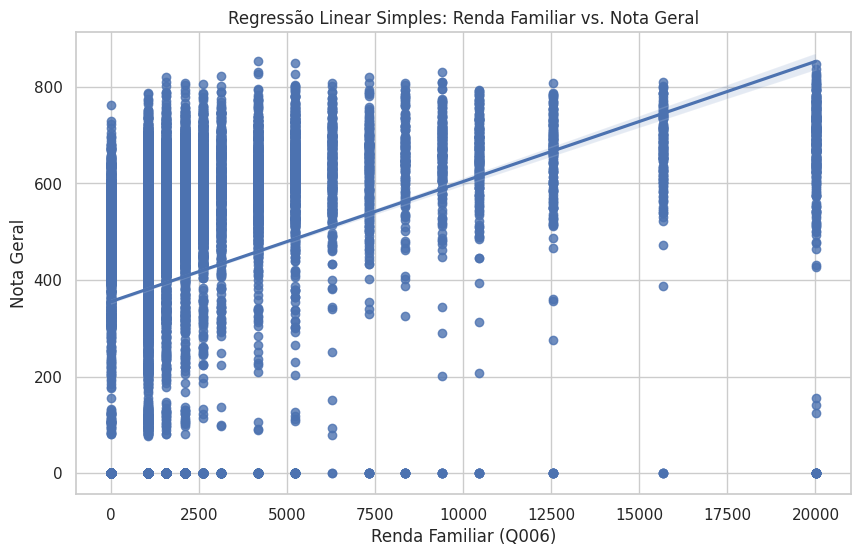

In [ ]:

plt.figure(figsize=(10, 6))
sns.regplot(x='Q006', y='MEDIA_GERAL', data=enem)
plt.title('Regressão Linear Simples: Renda Familiar vs. Nota Geral')
plt.xlabel('Renda Familiar (Q006)')
plt.ylabel('Nota Geral')
plt.show()


Com base nos resultados, podemos dizer que a renda familiar tem um efeito estatisticamente significativo na nota geral. Para cada aumento unitário na renda familiar, espera-se um aumento de 0.0249 na nota geral, mantendo todas as outras variáveis constantes. No entanto, a renda familiar explica apenas cerca de 9.9% da variabilidade observada na nota geral, indicando que outros fatores não incluídos no modelo também influenciam as notas dos alunos.

Entenda os principais resultados do modelo:

- Coeficientes: O coeficiente para a variável constante (const) é 355.4682, o que representa a interceptação da reta de regressão com o eixo y (nota geral) quando a renda familiar é zero. O coeficiente para a variável Q006 (renda familiar) é 0.0249, o que indica a mudança na nota geral para cada aumento unitário na renda familiar.

- R-squared (R²): O coeficiente de determinação indica a proporção da variabilidade na variável dependente (nota geral) que é explicada pela variabilidade na variável independente (renda familiar). Neste caso, o R² é 0.099, o que significa que cerca de 9.9% da variabilidade na nota geral é explicada pela renda familiar.

- F-statistic: Este é o valor da estatística F, que testa a significância global do modelo de regressão. Quanto maior o valor, mais significativo é o modelo como um todo. Neste caso, o valor é 2355, indicando que o modelo é significativo.

### Modelo de Regressão Linear Simples da Raça com Media Geral

In [ ]:
#X = sm.add_constant(enem_dummy[['TP_COR_RACA_Branca', 'TP_COR_RACA_Preta', 'TP_COR_RACA_Parda', 'TP_COR_RACA_Amarela', 'TP_COR_RACA_Indígena ']])
X = enem_dummy[['TP_COR_RACA_Branca']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))


coef: [95.15740001]
Intercept:  378.61134319903704
R2:  0.03313573263705738


- O coeficiente para a constante (const) é 378.6113. Isso significa que, quando a variável dummy "TP_COR_RACA_Branca" é 0 (ou seja, quando não é branca), a nota média geral esperada é de aproximadamente 378.6113.
- O coeficiente para a variável dummy "TP_COR_RACA_Branca" é 95.1574. Isso significa que, quando a variável dummy "TP_COR_RACA_Branca" é 1 (ou seja, quando é branca), a nota média geral esperada aumenta em aproximadamente 95.1574 pontos.
- O R-quadrado é 0.033, o que significa que aproximadamente 3.3% da variabilidade na nota média geral é explicada pela variável dummy "TP_COR_RACA_Branca" neste modelo. Em outras palavras, a inclusão da variável dummy "TP_COR_RACA_Branca" no modelo melhora a capacidade de prever a nota média geral em 3.3% em comparação com um modelo sem essa variável.

- Postanto, esse resultado sugere que ser branco está positivamente associado a notas médias mais altas no ENEM, com uma diferença significativa nas notas entre alunos brancos e não brancos. No entanto, é importante notar que o R-quadrado é relativamente baixo, o que significa que há outras variáveis não incluídas no modelo que também influenciam as notas dos alunos.

In [ ]:
X = enem_dummy[['TP_COR_RACA_Preta']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [-44.61195609]
Intercept:  415.1159720450951
R2:  0.0025821982986609093


- O coeficiente para a constante (const) é 415.1160. Isso significa que, quando a variável dummy "TP_COR_RACA_Preta" é 0 (ou seja, quando não é preta), a nota média geral esperada é de aproximadamente 415.1160.
- O coeficiente para a variável dummy "TP_COR_RACA_Preta" é -44.6120. Isso significa que, quando a variável dummy "TP_COR_RACA_Preta" é 1 (ou seja, quando é preta), a nota média geral esperada diminui em aproximadamente 44.6120 pontos.
- O R-quadrado é 0.003, o que significa que apenas cerca de 0.3% da variabilidade na nota média geral é explicada pela variável dummy "TP_COR_RACA_Preta" neste modelo. Isso sugere que a relação entre a raça preta e a nota média geral é muito fraca.

In [ ]:
X = enem_dummy[['TP_COR_RACA_Parda']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [-58.7123887]
Intercept:  441.9660410557184
R2:  0.013970441198443928


- O coeficiente para a constante (const) é 441.9660. Isso significa que, quando a variável dummy "TP_COR_RACA_Parda" é 0 (ou seja, quando não é parda), a nota média geral esperada é de aproximadamente 441.9660.
- O coeficiente para a variável dummy "TP_COR_RACA_Parda" é -58.7124. Isso significa que, quando a variável dummy "TP_COR_RACA_Parda" é 1 (ou seja, quando é parda), a nota média geral esperada diminui em aproximadamente 58.7124 pontos.
- O R-quadrado é 0.014, o que significa que apenas cerca de 1.4% da variabilidade na nota média geral é explicada pela variável dummy "TP_COR_RACA_Parda" neste modelo. Isso sugere que a relação entre a raça parda e a nota média geral é muito fraca.

### Modelo de Regressão Linear Simples com o fato de ter Internet com a Media Geral

In [ ]:
X = enem_dummy[['Q025_B']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [133.06530196]
Intercept:  291.6185402298849
R2:  0.026177783311042147


- O coeficiente para a variável dummy "ter internet" é 133.06530196. Isso significa que, em média, alunos que têm internet em casa tendem a ter uma nota média geral cerca de 133.07 pontos maior do que aqueles que não têm internet.
- O intercepto (Intercept) é 291.6185402298849. Isso representa a nota média geral esperada para os alunos que não têm internet em casa.
- O R-quadrado é 0.026177783311042147, o que indica que apenas cerca de 2.62% da variabilidade na nota média geral é explicada pelo fato de ter internet em casa neste modelo. Isso sugere que a relação entre ter internet e a nota média geral é muito fraca.

### Modelo de Regressão Linear Simples com o fato de ter Computador com a Media Geral

In [ ]:
X = enem_dummy[['Q024_A']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [-188.80027666]
Intercept:  529.0725904360751
R2:  0.13584830932408054


- O coeficiente para a variável dummy "não ter computador" é -188.80027666. Isso significa que, em média, alunos que não têm um computador em casa tendem a ter uma nota média geral cerca de 188.80 pontos menor do que aqueles que têm computador.
- O intercepto (Intercept) é 529.0725904360751. Isso representa a nota média geral esperada para os alunos que têm computador em casa.
- O R-quadrado é 0.13584830932408054, o que indica que cerca de 13.58% da variabilidade na nota média geral é explicada pelo fato de não ter um computador em casa neste modelo. Isso sugere que a relação entre não ter um computador em casa e a nota média geral dos alunos é mais substancial do que no caso da variável "ter internet".

### Modelo de Regressão Linear Simples do tipo da Escola com a Media Geral

In [ ]:
X = enem_dummy[['TP_ESCOLA_Privada']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [240.68220124]
Intercept:  364.37060310946714
R2:  0.1475268584351872


- O coeficiente para a variável dummy "escola privada" é 240.68220124. Isso significa que, em média, alunos que frequentam escolas privadas tendem a ter uma nota média geral cerca de 240.68 pontos maior do que aqueles que frequentam escolas públicas.
- O intercepto (Intercept) é 364.37060310946714. Isso representa a nota média geral esperada para os alunos que frequentam escolas públicas.
- O R-quadrado é 0.1475268584351872, o que indica que cerca de 14.75% da variabilidade na nota média geral é explicada pelo tipo de escola (privada ou pública) neste modelo. Isso sugere que a relação entre frequentar uma escola privada e a nota média geral dos alunos é mais substancial do que no caso da variável "ter internet" e "não ter computador".

In [ ]:
X = enem_dummy[['TP_ESCOLA_Pública']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [-240.68220124]
Intercept:  605.0528043530252
R2:  0.1475268584351873


- O coeficiente para a variável dummy "escola pública" é -240.68220124. Isso significa que, em média, alunos que frequentam escolas públicas tendem a ter uma nota média geral cerca de 240.68 pontos menor do que aqueles que frequentam escolas privadas.
- O intercepto (Intercept) é 605.0528043530252. Isso representa a nota média geral esperada para os alunos que frequentam escolas privadas.
R-quadrado (R2):
- O R-quadrado é 0.1475268584351873, o que indica que cerca de 14.75% da variabilidade na nota média geral é explicada pelo tipo de escola (pública ou privada) neste modelo. Isso sugere que a relação entre frequentar uma escola pública e a nota média geral dos alunos é mais substancial do que no caso da variável "ter internet" e "não ter computador".

### Modelo de Regressão Linear Simples do Sexo com a Media Geral

In [ ]:
X = enem_dummy[['TP_SEXO_M']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [1.48092775]
Intercept:  410.52313549734566
R2:  8.86512091591296e-06


In [ ]:
X = enem_dummy[['TP_SEXO_F']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [-1.48092775]
Intercept:  412.00406325060044
R2:  8.865120915690916e-06


- O coeficiente para a variável dummy "sexo masculino" é 1.48092775. Isso significa que, em média, alunos do sexo masculino tendem a ter uma nota média geral cerca de 1.48 pontos maior do que aqueles do sexo feminino.

- O intercepto (Intercept) para o sexo masculino é 410.52313549734566, enquanto para o sexo feminino é 412.00406325060044. Isso representa a nota média geral esperada para os alunos do sexo masculino e do sexo feminino, respectivamente.

- O R-quadrado é 8.86512091591296e-06 para o sexo masculino e 8.865120915690916e-06 para o sexo feminino, o que indica que cerca de 0.0008865% da variabilidade na nota média geral é explicada pelo sexo dos alunos neste modelo. Isso sugere que a relação entre o sexo dos alunos e a nota média geral não é substancial neste modelo.

### Modelo de Regressão Linear Simples com o fato de ter Carro com a Media Geral

In [ ]:
X = enem_dummy[['Q010_A']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [-155.25307219]
Intercept:  511.0427728517408
R2:  0.08989701358476176


In [ ]:
X = enem_dummy[['Q010_B']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [122.83853693]
Intercept:  374.0281592122831
R2:  0.05174894579725897


In [ ]:
X = enem_dummy[['Q010_C']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [188.92855163]
Intercept:  402.2417179787909
R2:  0.02622837206409101


In [ ]:
X = enem_dummy[['Q010_D']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [197.32134145]
Intercept:  410.16484276288077
R2:  0.0033392108148824207


In [ ]:
X = enem_dummy[['Q010_E']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [83.15568184]
Intercept:  411.0880681553307
R2:  0.00016710446275625124


- O coeficiente para a variável dummy "não possui carro" é -155.25307219. Isso significa que, em média, alunos que não possuem carro tendem a ter uma nota média geral cerca de 155.25 pontos menor do que aqueles que possuem carro.

- Para quem possui 1 carro, o coeficiente é 122.83853693, o que indica que, em média, alunos que possuem 1 carro tendem a ter uma nota média geral cerca de 122.84 pontos maior do que aqueles que não possuem carro.

- Para quem possui 2 carros, o coeficiente é 188.92855163, o que indica que, em média, alunos que possuem 2 carros tendem a ter uma nota média geral cerca de 188.93 pontos maior do que aqueles que não possuem carro.

- Para quem possui 3 carros, o coeficiente é 197.32134145, o que indica que, em média, alunos que possuem 3 carros tendem a ter uma nota média geral cerca de 197.32 pontos maior do que aqueles que não possuem carro.

- Para quem possui 3 carros, o coeficiente é 197.32134145, o que indica que, em média, alunos que possuem 3 carros tendem a ter uma nota média geral cerca de 197.32 pontos maior do que aqueles que não possuem carro.

- Para quem possui 4 carros, o coeficiente é 83.15568184, o que indica que, em média, alunos que possuem 3 carros tendem a ter uma nota média geral cerca de 83.15 pontos maior do que aqueles que não possuem carro.

- Os interceptos (Intercepts) para cada caso representam a nota média geral esperada para os alunos conforme a quantidade de carros que possuem.

- Os R-quadrados para cada caso indicam a proporção da variabilidade na nota média geral explicada pela posse de carro. Para quem não possui carro, o R-quadrado é 0.08989701358476176; para quem possui 1 carro, é 0.05174894579725897; e para quem possui 2 carros, é 0.02622837206409101. Isso sugere que a relação entre a posse de carro e a nota média geral dos alunos é mais substancial para quem não possui carro do que para os outros casos.

### Modelo de Regressão Linear Simples com o fato de ter Motocicleta com a Media Geral

In [ ]:
X = enem_dummy[['Q011_A']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [-1.17217638]
Intercept:  411.97952461227237
R2:  5.045870641207095e-06


In [ ]:
X = enem_dummy[['Q011_B']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [-0.42904679]
Intercept:  411.34408381541766
R2:  6.374868722902605e-07


In [ ]:
X = enem_dummy[['Q011_C']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [14.06646299]
Intercept:  410.74115175303405
R2:  0.00010399594261600864


In [ ]:
X = enem_dummy[['Q011_D']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [-51.36612868]
Intercept:  411.35061143523916
R2:  0.00011542746671178161


In [ ]:
X = enem_dummy[['Q011_E']]
y = enem_dummy['MEDIA_GERAL']

model = LinearRegression()
model.fit(X, y)

print('coef:', model.coef_)
print('Intercept: ',model.intercept_)
print('R2: ', model.score(X, y))

coef: [40.61824853]
Intercept:  411.1722276581865
R2:  2.6178125163922594e-05


- O coeficiente para a variável dummy "não possui carro" é -155.25307219. Isso significa que, em média, alunos que não possuem carro tendem a ter uma nota média geral cerca de 155.25 pontos menor do que aqueles que possuem carro.

- Para quem possui 1 carro, o coeficiente é 122.83853693, o que indica que, em média, alunos que possuem 1 carro tendem a ter uma nota média geral cerca de 122.84 pontos maior do que aqueles que não possuem carro.

- Para quem possui 2 carros, o coeficiente é 188.92855163, o que indica que, em média, alunos que possuem 2 carros tendem a ter uma nota média geral cerca de 188.93 pontos maior do que aqueles que não possuem carro.

- Para quem possui 3 carros, o coeficiente é 197.32134145, o que indica que, em média, alunos que possuem 3 carros tendem a ter uma nota média geral cerca de 197.32 pontos maior do que aqueles que não possuem carro.

- Para quem possui 3 carros, o coeficiente é 197.32134145, o que indica que, em média, alunos que possuem 3 carros tendem a ter uma nota média geral cerca de 197.32 pontos maior do que aqueles que não possuem carro.

- Para quem possui 4 carros, o coeficiente é 83.15568184, o que indica que, em média, alunos que possuem 3 carros tendem a ter uma nota média geral cerca de 83.15 pontos maior do que aqueles que não possuem carro.

- Os interceptos (Intercepts) para cada caso representam a nota média geral esperada para os alunos conforme a quantidade de carros que possuem.

- Os R-quadrados para cada caso indicam a proporção da variabilidade na nota média geral explicada pela posse de carro. Para quem não possui carro, o R-quadrado é 0.08989701358476176; para quem possui 1 carro, é 0.05174894579725897; e para quem possui 2 carros, é 0.02622837206409101. Isso sugere que a relação entre a posse de carro e a nota média geral dos alunos é mais substancial para quem não possui carro do que para os outros casos.

## Regressão Linear Múltipla



### Regressão Linear Multipla com as variaveis Independentes Renda familiar, Ter Internet, Raça Branca, Escola Privada, Estado Civil Solteiro

In [ ]:
enem_dummy['Q006'] = enem_dummy['Q006'].replace([np.inf], 20001)
enem_dummy['Q006'] = enem_dummy['Q006'].apply(lambda x: min(x, 20001))

X = enem_dummy[['Q006', 'Q025_B', 'TP_COR_RACA_Branca', 'Q024_A', 'TP_ESCOLA_Privada', 'TP_ESTADO_CIVIL_Solteiro(a)', 'TP_LOCALIZACAO_ESC_Urbana']]
y = enem_dummy['MEDIA_GERAL']


modelo1 = (sm.OLS(y,sm.add_constant(X.astype(float))).fit())
modelo1.summary(title='Sumário do modelo com intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Sumário do modelo com intercepto                       
==============================================================================
Dep. Variable:            MEDIA_GERAL   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     864.4
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        01:57:12   Log-Likelihood:            -1.4627e+05
No. Observations:               21483   AIC:                         2.926e+05
Df Residuals:                   21475   BIC:                         2.926e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         262.5866     12.018     21.849      0.000     239.030     286.144
Q006                            0.0058      0.001      9.778      0.000       0.005       0.007
Q025_B                         45.7448      5.127      8.922      0.000      35.695      55.794
TP_COR_RACA_Branca             37.7439      3.258     11.585      0.000      31.358      44.130
Q024_A                       -104.7672      3.626    -28.892      0.000    -111.875     -97.660
TP_ESCOLA_Privada             141.6309      4.716     30.030      0.000     132.387     150.875
TP_ESTADO_CIVIL_Solteiro(a)    97.9680      6.398     15.312      0.000      85.427     110.509
TP_LOCALIZACAO_ESC_Urbana      27.9209      9.131      3.058      0.002      10.024      45.818
==============================================================================
Omnibus:                     2457.081   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2092.804
Skew:                          -0.683   Prob(JB):                         0.00
Kurtosis:                       2.311   Cond. No.                     3.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Dep. Variable (Variável Dependente): É a variável que você está tentando prever, no nosso caso, é a "MEDIA_GERAL", que representa a média geral das notas do ENEM.
- R-squared (R²): É uma medida da proporção da variabilidade na variável dependente que é explicada pelo modelo. Neste caso, cerca de 22,20% da variabilidade na média **geral** das notas é explicada pelas variáveis independentes incluídas no modelo.
- F-statistic (Estatística F): É um teste estatístico para a significância global do modelo. Neste caso, o valor da estatística F é grande (864.4), o que sugere que o modelo é globalmente significativo.
- Prob (F-statistic): É o valor p associado à estatística F. Um valor p baixo (próximo a zero) indica que o modelo como um todo é significativo. Neste caso, o valor p é próximo de zero, o que sugere que o modelo é globalmente significativo.

- const (constante): Este é o intercepto da regressão, representando o valor esperado da variável dependente, a média geral das notas quando todas as variáveis independentes são zero. Neste modelo, o intercepto é 262.5866. Isso significa que, se todas as outras variáveis independentes forem zero, espera-se que a média geral das notas seja de aproximadamente 262.5866.

- Q006 (renda familiar): Este coeficiente representa a mudança esperada na média geral das notas para uma unidade de mudança na renda familiar. Sendo, 0.0058. Isso significa que, para cada unidade de aumento na renda familiar, espera-se um aumento de 0.0058 na média geral das notas, mantendo todas as outras variáveis constantes.

- Q025_B (acesso à internet): Este coeficiente representa a mudança esperada na média geral das notas para aqueles que têm acesso à internet em comparação com aqueles que não têm. Aqui, o coeficiente é 45.7448, o que indica que os alunos com acesso à internet tendem a ter, em média, 45.7448 pontos a mais na média geral das notas, mantendo todas as outras variáveis constantes.

- TP_COR_RACA_Branca (raça branca): Este coeficiente representa a diferença esperada na média geral das notas entre os alunos de raça branca e os alunos de outras raças. Aqui, o coeficiente é 37.7439, o que indica que os alunos de raça branca tendem a ter, em média, 37.7439 pontos a mais na média geral das notas, mantendo todas as outras variáveis constantes.

- Q024_A (sem computador em casa): Este coeficiente representa a diferença esperada na média geral das notas para aqueles que não têm computador em casa em comparação com aqueles que têm. Aqui, o coeficiente é -104.7672, o que indica que os alunos que não têm computador em casa tendem a ter, em média, 104.7672 pontos a menos na média geral das notas, mantendo todas as outras variáveis constantes.

- TP_ESCOLA_Privada (escola privada): Este coeficiente representa a diferença esperada na média geral das notas entre os alunos de escola privada e os alunos de escola pública. Aqui, o coeficiente é 141.6309, o que indica que os alunos de escola privada tendem a ter, em média, 141.6309 pontos a mais na média geral das notas, mantendo todas as outras variáveis constantes.

- TP_ESTADO_CIVIL_Solteiro(a) (estado civil solteiro): Este coeficiente representa a diferença esperada na média geral das notas entre os alunos solteiros e os alunos que não são solteiros. Aqui, o coeficiente é 97.9680, o que indica que os alunos solteiros tendem a ter, em média, 97.9680 pontos a mais na média geral das notas, mantendo todas as outras variáveis constantes.

- TP_LOCALIZACAO_ESC_Urbana: Este coeficiente representa a diferença esperada na média geral das notas entre os alunos das escolas localizadas em regiões urbanas e os alunos que não são dessa região. Aqui, o coeficiente é 27.9209, o que indica que os alunos solteiros tendem a ter, em média, 27.9209 pontos a mais na média geral das notas, mantendo todas as outras variáveis constantes.

Agora vamos analisar o mesmo modelo mas sem o intercept:

Quando você ajusta um modelo de regressão linear sem intercepto, está forçando a reta de regressão a passar pela origem (0,0) do gráfico. Isso significa que o valor da variável dependente (no nosso caso, a média geral das notas) será considerado zero quando todas as variáveis independentes forem zero.

A principal diferença entre um modelo com intercepto e um modelo sem intercepto está na interpretação do coeficiente das variáveis independentes e na interpretação dos resultados do modelo.

In [ ]:
modelo2 = sm.OLS(y,X.astype(float)).fit()
modelo2.summary(title='Sumário do modelo sem intercepto')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Sumário do modelo sem intercepto                           
=======================================================================================
Dep. Variable:            MEDIA_GERAL   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.780
Method:                 Least Squares   F-statistic:                          1.272e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):                        0.00
Time:                        23:02:06   Log-Likelihood:                     -1.4685e+05
No. Observations:               21483   AIC:                                  2.937e+05
Df Residuals:                   21477   BIC:                                  2.938e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Q006                            0.0088      0.001     14.530      0.000       0.008       0.010
Q025_B                        143.0315      4.393     32.563      0.000     134.422     151.641
TP_COR_RACA_Branca             50.2713      3.325     15.118      0.000      43.753      56.789
Q024_A                        -47.1970      3.299    -14.305      0.000     -53.664     -40.730
TP_ESCOLA_Privada             153.6877      4.825     31.850      0.000     144.230     163.146
TP_ESTADO_CIVIL_Solteiro(a)   250.8651      4.721     53.142      0.000     241.612     260.118
==============================================================================
Omnibus:                     1492.687   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1520.442
Skew:                          -0.606   Prob(JB):                         0.00
Kurtosis:                       2.521   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Q006 (Renda Familiar): Para cada aumento unitário na renda familiar, a média geral das notas aumenta em 0.0088 pontos.
- Q025_B (Acesso à Internet): Os alunos com acesso à internet tendem a ter uma média geral das notas 143.0315 pontos maior do que aqueles sem acesso, mantendo outras variáveis constantes.
- TP_COR_RACA_Branca (Raça Branca): Alunos de raça branca tendem a ter uma média geral das notas 50.2713 pontos maior do que alunos de outras raças, mantendo outras variáveis constantes.
- Q024_A (Sem Computador em Casa): Alunos sem computador em casa tendem a ter uma média geral das notas 47.1970 pontos menor do que aqueles com computador, mantendo outras variáveis constantes.
- TP_ESCOLA_Privada (Tipo de Escola - Privada): Alunos de escolas privadas tendem a ter uma média geral das notas 153.6877 pontos maior do que alunos de escolas públicas, mantendo outras variáveis constantes.
- TP_ESTADO_CIVIL_Solteiro(a) (Estado Civil - Solteiro(a)): Alunos solteiros tendem a ter uma média geral das notas 250.8651 pontos maior do que alunos casados ou em outra condição civil, mantendo outras variáveis constantes.

In [ ]:
enem_dummy['Q006'] = enem_dummy['Q006'].replace([np.inf], 20001)
enem_dummy['Q006'] = enem_dummy['Q006'].apply(lambda x: min(x, 20001))

data = {
    'Renda_Familiar': enem_dummy['Q006'],  # Variável da renda familiar
    'Raça_Branca': enem_dummy['TP_COR_RACA_Branca'],  # Variável dummy para raça branca
    'Raça_Preta': enem_dummy['TP_COR_RACA_Preta'],  # Variável dummy para raça preta
    'Raça_Parda': enem_dummy['TP_COR_RACA_Parda'],  # Variável dummy para raça parda
    'Acesso_Internet': enem_dummy['Q025_B'],  # Variável dummy para acesso à internet
    'Não_ter_Computador': enem_dummy['Q024_A'],  # Variável dummy para posse de computador
    'Tipo_Escola_Privada': enem_dummy['TP_ESCOLA_Privada'],  # Variável dummy para tipo de escola (privada)
    'Tipo_Escola_Pública': enem_dummy['TP_ESCOLA_Pública'],  # Variável dummy para tipo de escola (pública)
    'Um_Carro': enem_dummy['Q010_B'],  # Variável dummy para posse de carro
    'Uma_Motocicleta': enem_dummy['Q011_B'],  # Variável dummy para posse de motocicleta
    'Média_ENEM': enem['MEDIA_GERAL']  # Variável dependente (média do ENEM)
}

df = pd.DataFrame(data)

# Adicionando uma coluna de interceptação ao DataFrame
df['Intercept'] = 1

# Definindo variáveis independentes e dependentes
X = df[['Intercept', 'Renda_Familiar', 'Raça_Branca', 'Raça_Preta', 'Raça_Parda',
        'Acesso_Internet', 'Não_ter_Computador', 'Tipo_Escola_Privada', 'Tipo_Escola_Pública', 'Um_Carro', 'Uma_Motocicleta']]
y = df['Média_ENEM']

# Criando e ajustando o modelo de regressão linear múltipla
modelo = sm.OLS(y, X.astype(float)).fit()

# Imprimindo os resultados do modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:             Média_ENEM   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     654.3
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:23:58   Log-Likelihood:            -1.4633e+05
No. Observations:               21483   AIC:                         2.927e+05
Df Residuals:                   21473   BIC:                         2.928e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             272.7247    

- Renda_Familiar (Q006): Para cada aumento unitário na renda familiar (Q006), a média geral das notas aumenta em 0.0058 pontos. Portanto, para cada incremento de uma unidade na renda familiar, espera-se um aumento de aproximadamente 0.0058 pontos na média geral das notas do ENEM, mantendo as outras variáveis constantes.

- Raça_Branca (TP_COR_RACA_Branca): Alunos de raça branca tendem a ter uma média geral das notas 66.4115 pontos maior do que alunos de outras raças, mantendo outras variáveis constantes. Isso implica que, em média, alunos de raça branca têm pontuações cerca de 66.4115 pontos mais altas no ENEM do que alunos de outras raças, quando todas as outras variáveis são mantidas constantes.

- Raça_Preta (TP_COR_RACA_Preta): Alunos de raça preta tendem a ter uma média geral das notas 26.4395 pontos maior do que alunos de outras raças, mantendo outras variáveis constantes. Isso sugere que, em média, alunos de raça preta têm pontuações cerca de 26.4395 pontos mais altas no ENEM do que alunos de outras raças, quando todas as outras variáveis são mantidas constantes.

- Raça_Parda (TP_COR_RACA_Parda): Alunos de raça parda tendem a ter uma média geral das notas 31.0926 pontos maior do que alunos de outras raças, mantendo outras variáveis constantes. Isso implica que, em média, alunos de raça parda têm pontuações cerca de 31.0926 pontos mais altas no ENEM do que alunos de outras raças, quando todas as outras variáveis são mantidas constantes.

- Acesso_Internet (Q025_B): Alunos com acesso à internet tendem a ter uma média geral das notas 43.1204 pontos maior do que aqueles sem acesso, mantendo outras variáveis constantes. Isso sugere que, em média, alunos com acesso à internet têm pontuações cerca de 43.1204 pontos mais altas no ENEM do que alunos sem acesso à internet, quando todas as outras variáveis são mantidas constantes.

- Não_ter_Computador (Q024_A): Alunos sem computador tendem a ter uma média geral das notas 98.4252 pontos menor do que aqueles com computador, mantendo outras variáveis constantes. Isso indica que, em média, alunos sem acesso a computadores em casa têm pontuações cerca de 98.4252 pontos mais baixas no ENEM do que alunos com acesso a computadores, quando todas as outras variáveis são mantidas constantes.

- Tipo_Escola_Privada (TP_ESCOLA_Privada): Alunos de escolas privadas tendem a ter uma média geral das notas 205.1498 pontos maior do que alunos de escolas públicas, mantendo outras variáveis constantes. Isso sugere que, em média, alunos de escolas privadas têm pontuações cerca de 205.1498 pontos mais altas no ENEM do que alunos de escolas públicas, quando todas as outras variáveis são mantidas constantes.

- Tipo_Escola_Pública (TP_ESCOLA_Pública): Alunos de escolas públicas tendem a ter uma média geral das notas 67.5749 pontos maior do que alunos de escolas privadas, mantendo outras variáveis constantes. Isso implica que, em média, alunos de escolas públicas têm pontuações cerca de 67.5749 pontos mais altas no ENEM do que alunos de escolas privadas, quando todas as outras variáveis são mantidas constantes.

- Um_Carro (Q010_B): Alunos com carro tendem a ter uma média geral das notas 34.2136 pontos maior do que aqueles sem carro, mantendo outras variáveis constantes. Isso sugere que, em média, alunos com carro têm pontuações cerca de 34.2136 pontos mais altas no ENEM do que alunos sem carro, quando todas as outras variáveis são mantidas constantes.

- Uma_Motocicleta (Q011_B): Alunos com motocicleta tendem a ter uma média geral das notas 6.9728 pontos maior do que aqueles sem motocicleta, mantendo outras variáveis constantes. Isso implica que, em média, alunos com motocicleta têm pontuações cerca de 6.9728 pontos mais altas no ENEM do que alunos sem motocicleta, quando todas as outras variáveis são mantidas constantes.

## Regressão Logistica

In [ ]:
enem_dummy['boa_nota'] = enem_dummy['MEDIA_GERAL'].apply(lambda x: True if x >= 511 else False)


In [ ]:
enem_dummy['Q006'] = enem_dummy['Q006'].replace([np.inf], 20001)
enem_dummy['Q006'] = enem_dummy['Q006'].apply(lambda x: min(x, 20001))

X = X = enem_dummy[['Q006', 'Q025_B', 'TP_COR_RACA_Branca', 'TP_COR_RACA_Preta', 'Q024_A', 'TP_ESCOLA_Privada', 'TP_ESTADO_CIVIL_Solteiro(a)', 'TP_ESTADO_CIVIL_Casado(a)/Mora com companheiro(a)']]

# Variável dependente (alvo)
y = enem_dummy['boa_nota']

# Adiciona a constante
X = sm.add_constant(X.astype(float))

In [ ]:

# Divisão dos dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                   random_state=1,
                                                   stratify=y)

In [ ]:

# Instancia e treina o modelo
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

# Imprime o resumo da Regressão Logística
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.567763
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               boa_nota   No. Observations:                15038
Model:                          Logit   Df Residuals:                    15029
Method:                           MLE   Df Model:                            8
Date:                Wed, 01 May 2024   Pseudo R-squ.:                  0.1794
Time:                        00:54:55   Log-Likelihood:                -8538.0
converged:                       True   LL-Null:                       -10404.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                         

- Constante (const): O valor negativo indica que, quando todas as outras variáveis ​​são mantidas constantes, a probabilidade de obter uma "nota acima da média" diminui. Esse valor representa o intercepto da regressão logística.

- Q006 (renda familiar): Um coeficiente positivo indica que um aumento na renda familiar está associado a uma maior probabilidade de obter uma "nota acima da média". Isso sugere que alunos com maior renda familiar tendem a ter melhores desempenhos.

- Q025_B (acesso à internet): Um coeficiente positivo sugere que alunos com acesso à internet têm uma probabilidade maior de obter uma "nota acima da média" em comparação com aqueles sem acesso à internet.

- TP_COR_RACA_Branca (raça branca): Um coeficiente positivo indica que alunos de raça branca têm uma probabilidade maior de obter uma "nota acima da média" em comparação com alunos de outras raças.

- TP_COR_RACA_Preta (raça preta): Um coeficiente negativo sugere que alunos de raça preta têm uma probabilidade menor de obter uma "nota acima da média" em comparação com alunos de outras raças.

- Q024_A (sem computador em casa): Um coeficiente negativo sugere que alunos sem computador em casa têm uma probabilidade menor de obter uma "nota acima da média" em comparação com aqueles que têm.

- TP_ESCOLA_Privada (escola privada): Um coeficiente positivo sugere que alunos de escola privada têm uma probabilidade maior de obter uma "nota acima da média" em comparação com alunos de escola pública.

- TP_ESTADO_CIVIL_Solteiro(a) (estado civil solteiro): Um coeficiente positivo sugere que alunos solteiros têm uma probabilidade maior de obter uma "nota acima da média" em comparação com alunos que não são solteiros.

- TP_ESTADO_CIVIL_Casado(a)/Mora com companheiro(a) (estado civil casado ou mora com companheiro): Um coeficiente negativo sugere que alunos casados ou que moram com companheiro(a) têm uma probabilidade menor de obter uma "nota acima da média" em comparação com alunos que não estão nessa situação.

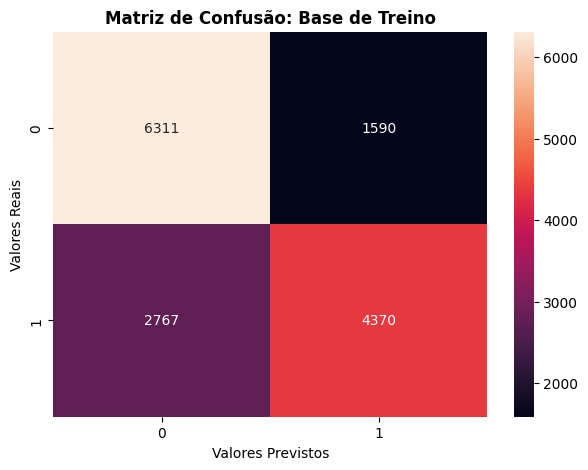

In [ ]:
pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

# Gera a Matriz de Confusão
cm = confusion_matrix(y_train, pred_train)

# Plot da Matriz de Confusão
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Matriz de Confusão: Base de Treino', weight='bold')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()

Podemos ver que de 15038 exemplos que temos na base de treino, acertamos 10681.

Precisamos dos quatro quadrantes para calcular nossas métricas. Foram 4370 VPs, 6311 VNs, 1590 FPs e 2767 FNs.

In [ ]:
# Acurácia
acc = accuracy_score(y_train, pred_train)
# Precisão
prec = precision_score(y_train, pred_train)
# Recall
rec = recall_score(y_train, pred_train)

print(f'Acurácia na base de treino: {round(acc, 2) * 100}%')
print(f'Precisão na base de treino: {round(prec, 2) * 100}%')
print(f'Recall na base de treino: {round(rec, 2) * 100}%')


Acurácia na base de treino: 71.0%
Precisão na base de treino: 73.0%
Recall na base de treino: 61.0%


- Acurácia (Accuracy): A acurácia é uma medida geral da precisão do modelo e representa a proporção de previsões corretas (TPs e TNs) em relação ao total de previsões. No seu caso, a acurácia na base de treino é de 71.0%, o que significa que o modelo classificou corretamente 71.0% de todas as observações.
- Precisão (Precision): A precisão é a proporção de verdadeiros positivos (TPs) em relação a todas as observações classificadas como positivas pelo modelo (TPs e FPs). No seu caso, a precisão na base de treino é de 73.0%, o que significa que, das observações classificadas como "nota acima da média" pelo modelo, 73.0% realmente obtiveram uma "nota acima da média".
- Recall (Revocação ou Sensibilidade): O recall é a proporção de verdadeiros positivos (TPs) em relação ao total de observações que realmente pertencem à classe positiva (TPs e FNs). No seu caso, o recall na base de treino é de 61.0%, o que significa que o modelo identificou corretamente 61.0% de todas as observações que realmente eram "Nota acima da média".